# Insurance Claim Fraud Detection

# Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Independent Variables

1.	months_as_customer: Number of months of patronage

2.	age: the length of time a customer has lived or a thing has existed

3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer

4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance

5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

6.	policy_csl: is basically Combined Single Limit

7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss

8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year

9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies

10.	insured_zip: It is the zip code where the insurance was made

11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

12.	insured_education_level: This refers to the Level of education of the customer

13.	insured_occupation: This refers Occupation of the customer

14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership

16.	capital-gains: This refers to profit accrued due to insurance premium

17.	capital-loss: This refers to the losses incurred due to insurance claims

18.	incident_date: This refers to the date which claims where made by customers

19.	incident_type: This refers to the type of claim/vehicle damage made by customer

20.	collision_type: This refers to the area of damage on the vehicle

21.	incident_severity: This refers to the extent/level of damage

22.	authorities_contacted: This refers to the government agencies that were contacted after damage

23.	incident_state: This refers to the state at which the accident happened

24.	incident_city: This refers to the city at which the accident happened

25.	1ncident_location: This refers to the location at which the accident happened

26.	incident_hour_of_the_day: The period of the day which accident took place

27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident

28.	property_damage: This refers to whether property was damaged or not

29.	bodily_injuries: This refers to injuries sustained

30.	witnesses: This refers to the number of witnesses involved

31.	police_report_available: This refers to whether the report on damage was documented or not

32.	total_claim_amount: This refers to the financial implications involved in claims

33.	injury_claim: This refers to physical injuries sustained

34.	property_claim: This refers to property damages during incident

35.	vehicle_claim: This refers to property damages during incident

36.	auto_make: This refers to the make of the vehicle

37.	auto_model: This refers to the model of the vehicle

38.	auto_year: This refers to  year which the vehicle was manufactured

39.	_c39:

40.	fraud_reported




# Dataset Link

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv

# Import the needed libraries for data preprocessing, model selection, model building and evaluation

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import FactorAnalysis
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,r2_score

# Read the dataset and print first ten records using pandas head method

In [11]:
insurancedf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\Automobile_insurance_fraud.csv')
insurancedf.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Get the information about the dataset using pandas info method

In [15]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The above information shows that there are 1000 records and 40 columns in the dataset. There are null records present in the dataset for the column authorities_contacted.

# Remove punctuations from the dataset

In [19]:
insurancedf=insurancedf.replace(r'[?]',np.nan,regex=True)

In [21]:
insurancedf.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Check for the null records present in the dataset using pandas isnull method

In [24]:
insurancedf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are null records present in the columns collision_type, authorities_contacted, property_damage, police_report_available and _c39

# Get the total rows and columns using pandas shape method

In [28]:
insurancedf.shape

(1000, 40)

There are 1000 rows and 40 columns present in the dataset.

In [31]:
# drop the column _39
insurancedf=insurancedf.drop(columns='_c39',axis=1)

# Check for the duplicate records present in the dataset using pandas duplicated method

In [34]:
insurancedf.duplicated().sum()

0

There are no duplicate records present in the dataset.

In [37]:
insurancedf['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

# SimpleImputer to remove null records in the dataset

In [40]:
columns=["collision_type","authorities_contacted","property_damage","police_report_available"]
si=SimpleImputer(strategy="most_frequent")
insurancedf[columns]=si.fit_transform(insurancedf[columns])

In [42]:
insurancedf.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Univariate Analysis

# Countplot for policy csl

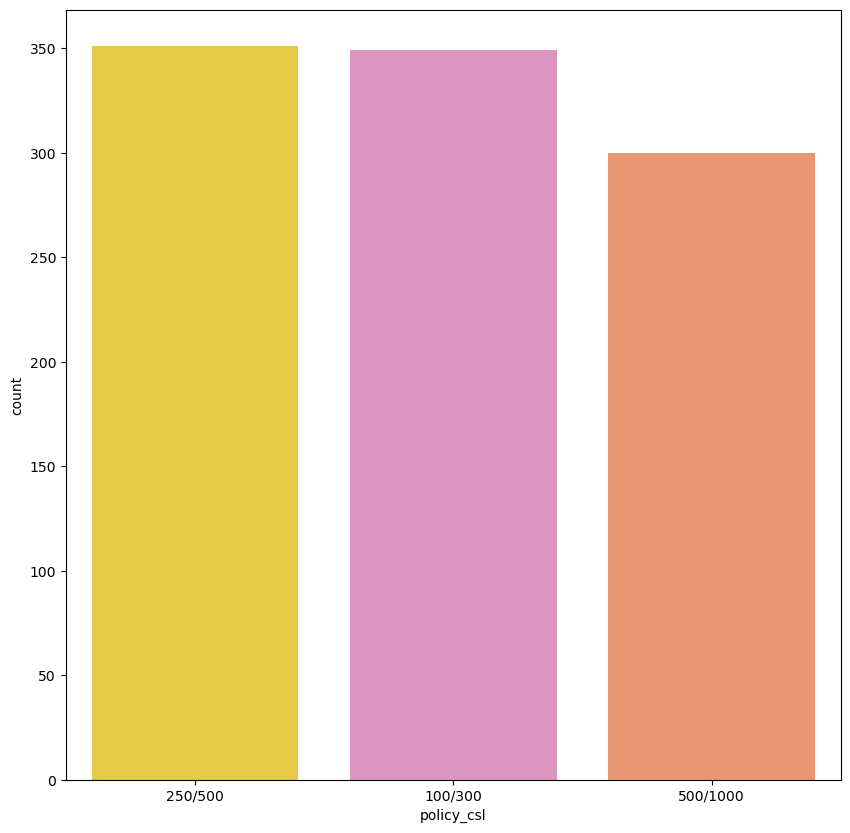

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='policy_csl',palette='Set2_r')
plt.show()

# Countplot for policy state

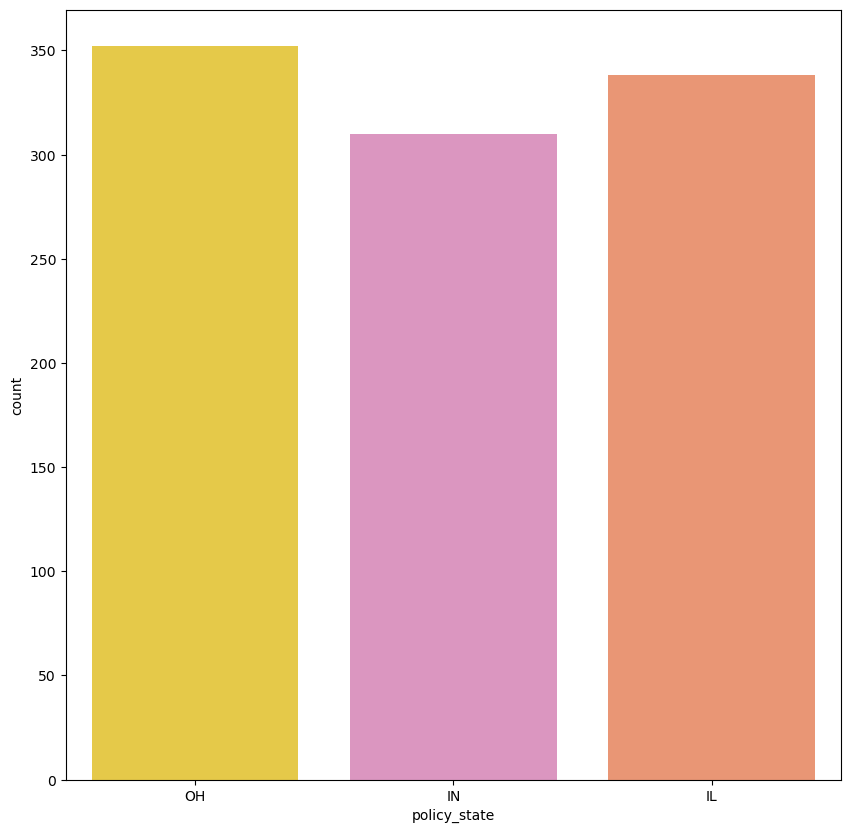

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='policy_state',palette='Set2_r')
plt.show()

# Countplot for policy deductable (amount to be paid for insured loss)

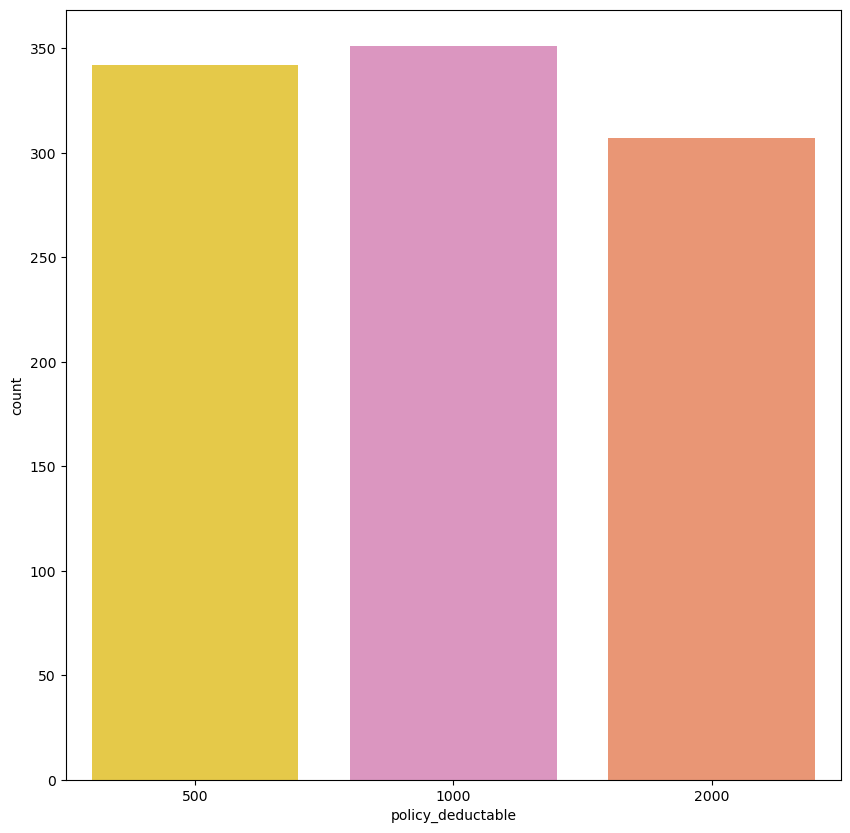

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='policy_deductable',palette='Set2_r')
plt.show()

# Countplot for umbrella limit

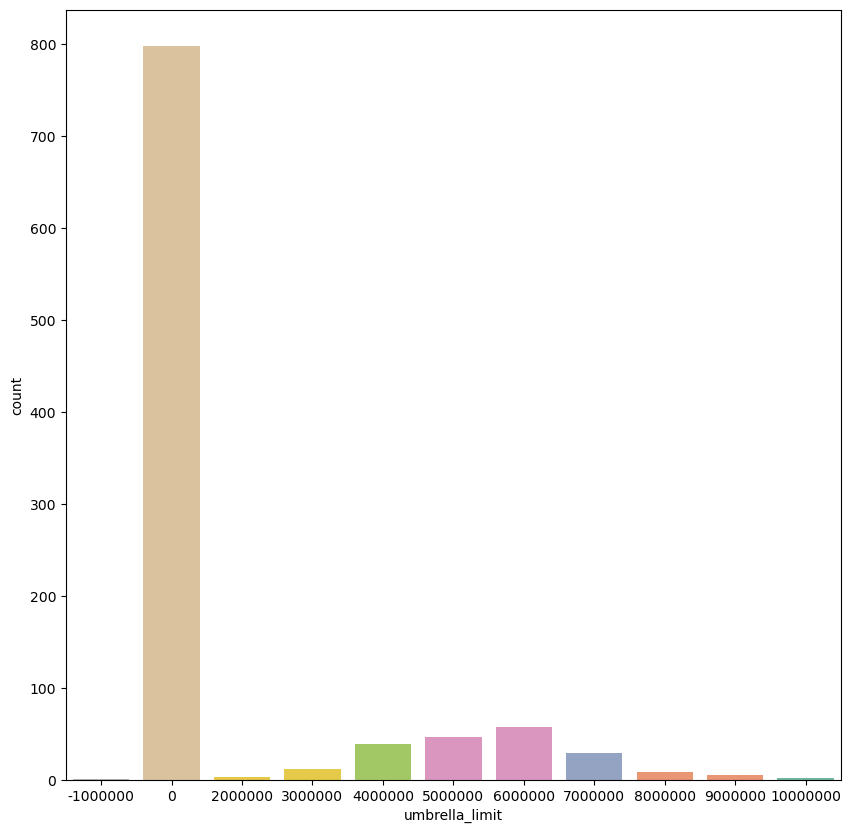

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='umbrella_limit',palette='Set2_r')
plt.show()

# Countplot for insured education level

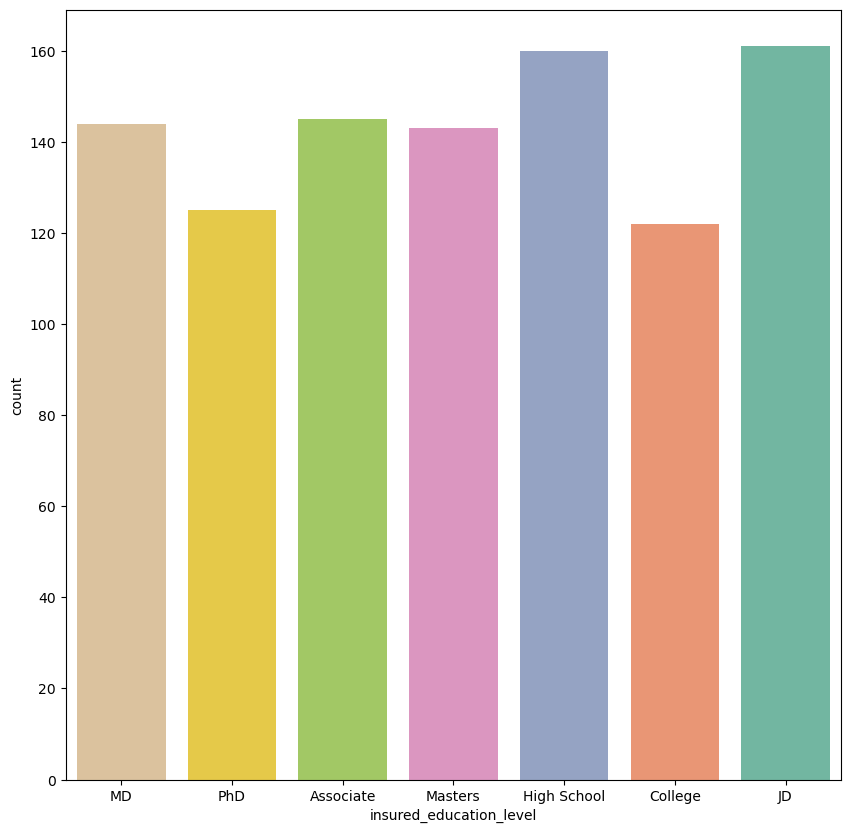

In [58]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='insured_education_level',palette='Set2_r')
plt.show()

# Countplot for insured occupation

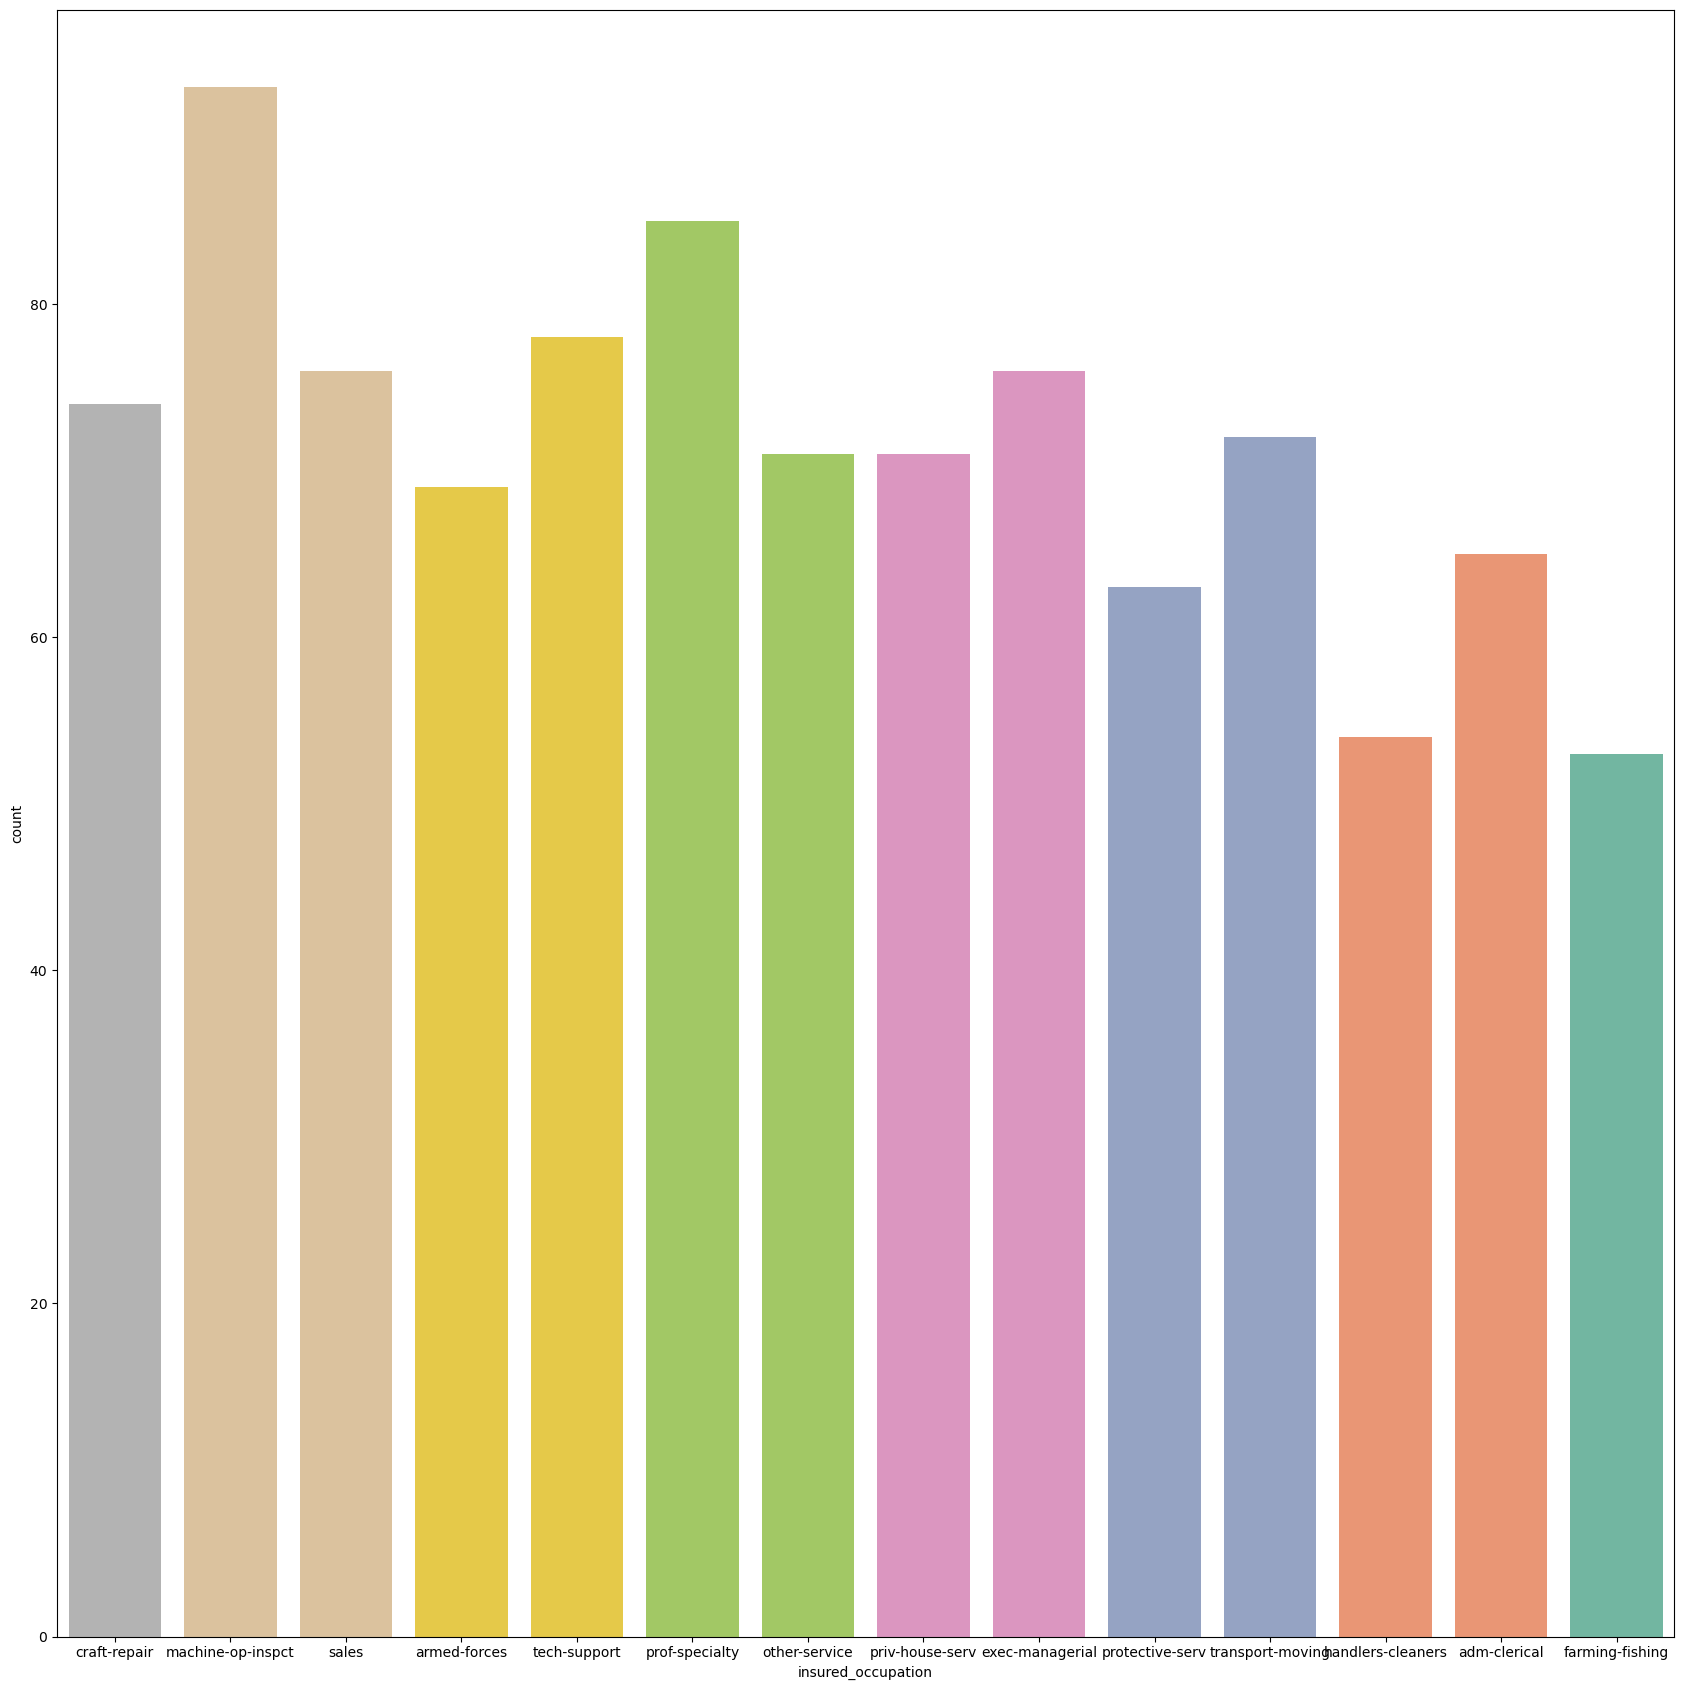

In [61]:
plt.figure(figsize=(17,17))
sns.countplot(insurancedf,x='insured_occupation',palette='Set2_r')
plt.tight_layout()

# Countplot for insured hobbies

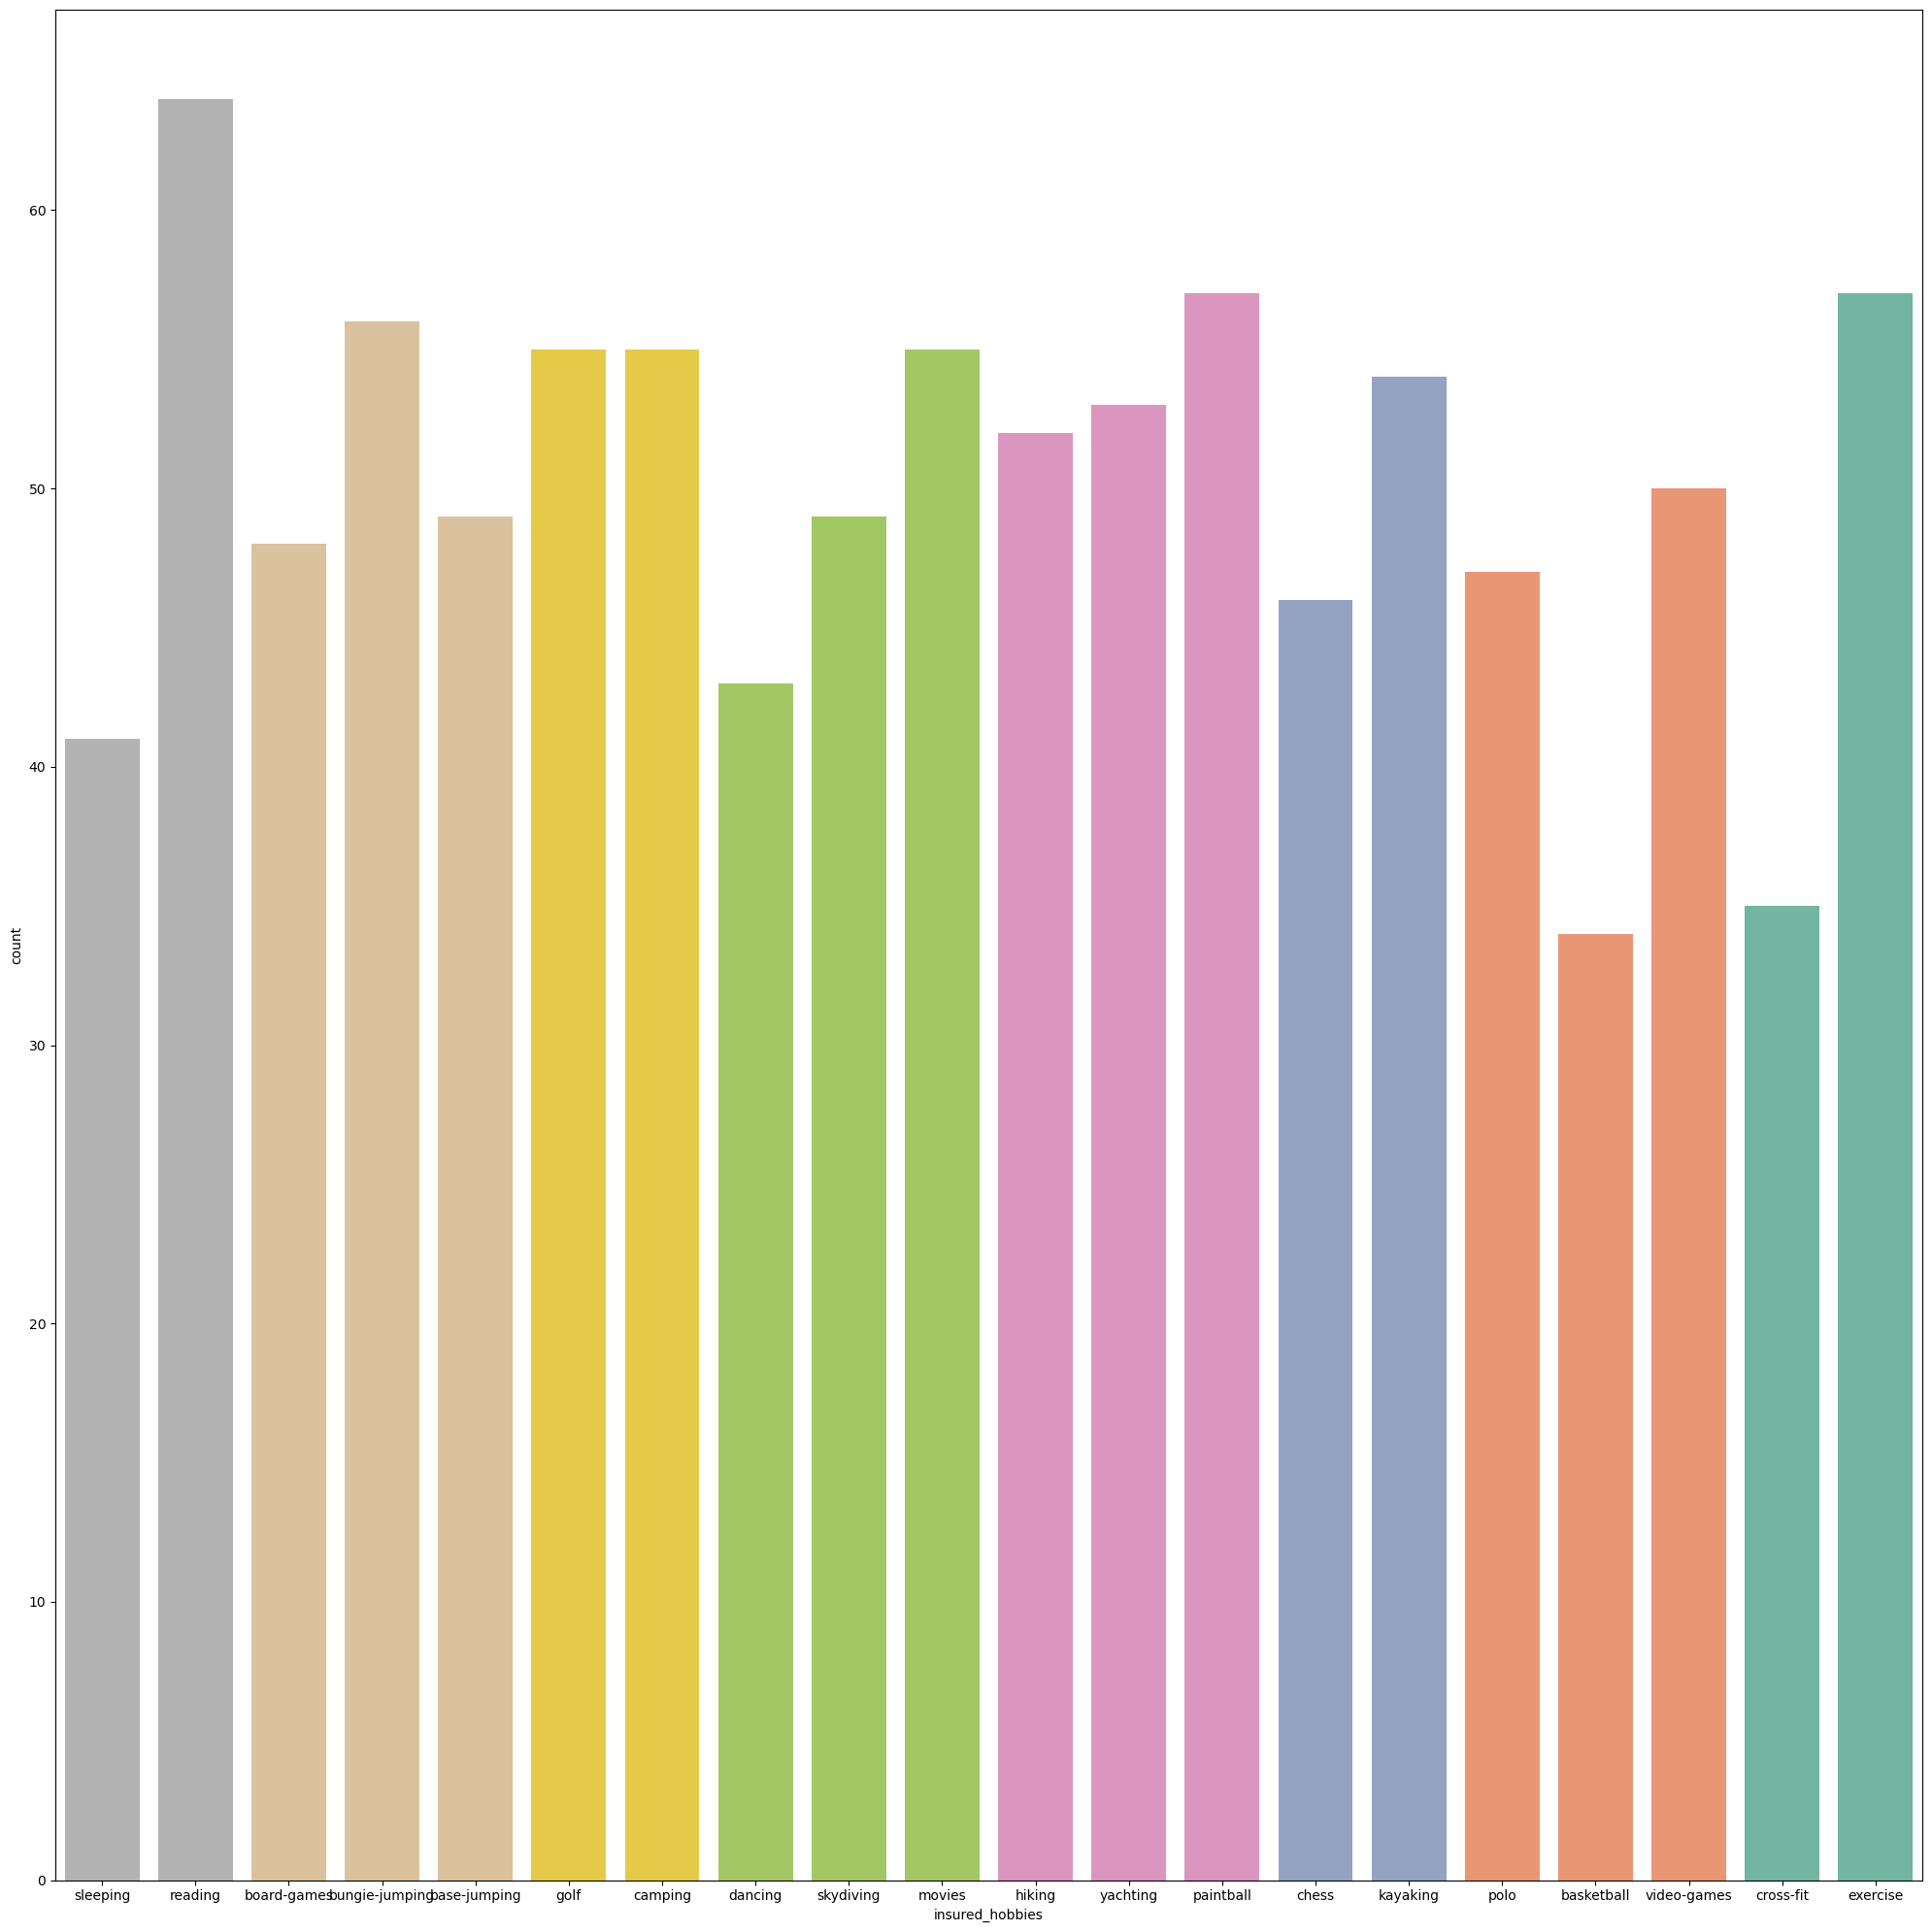

In [64]:
plt.figure(figsize=(20,20))
sns.countplot(insurancedf,x='insured_hobbies',palette='Set2_r')
plt.tight_layout()

# Countplot for incident type

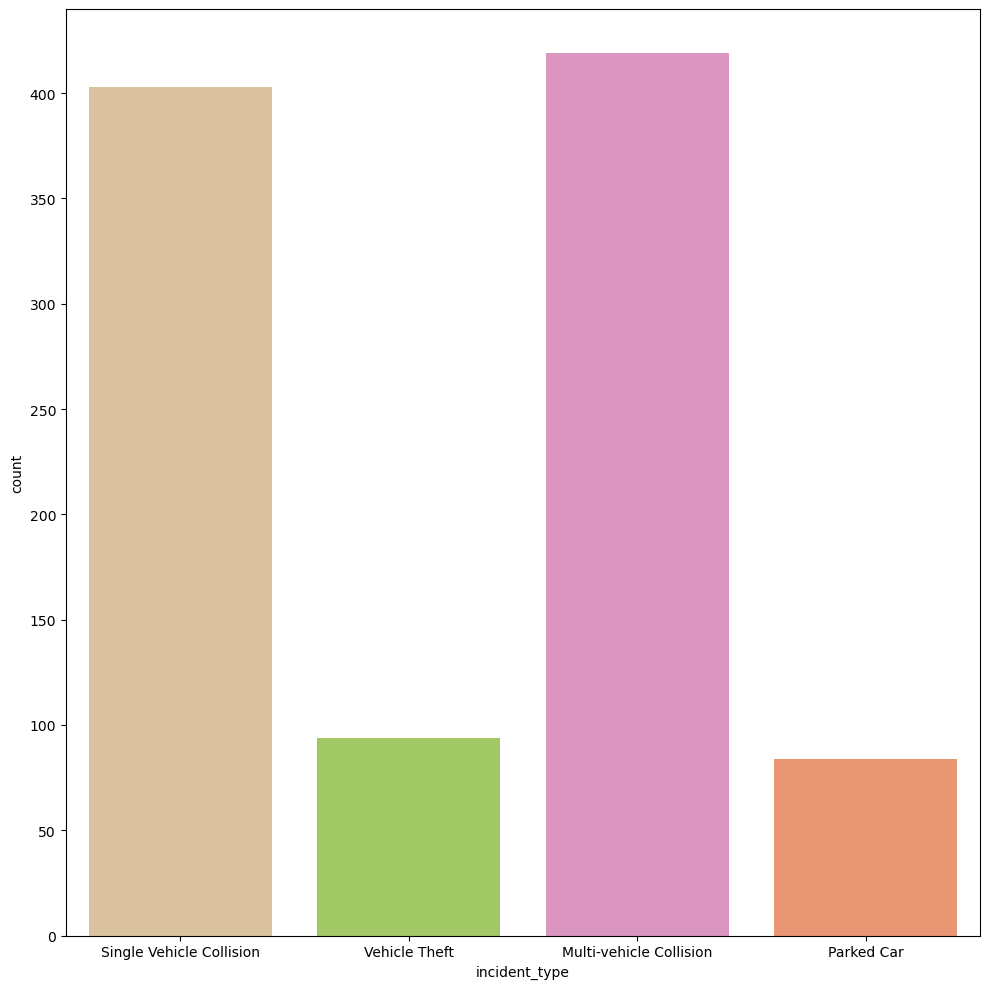

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='incident_type',palette='Set2_r')
plt.tight_layout()

# Countplot for collision type

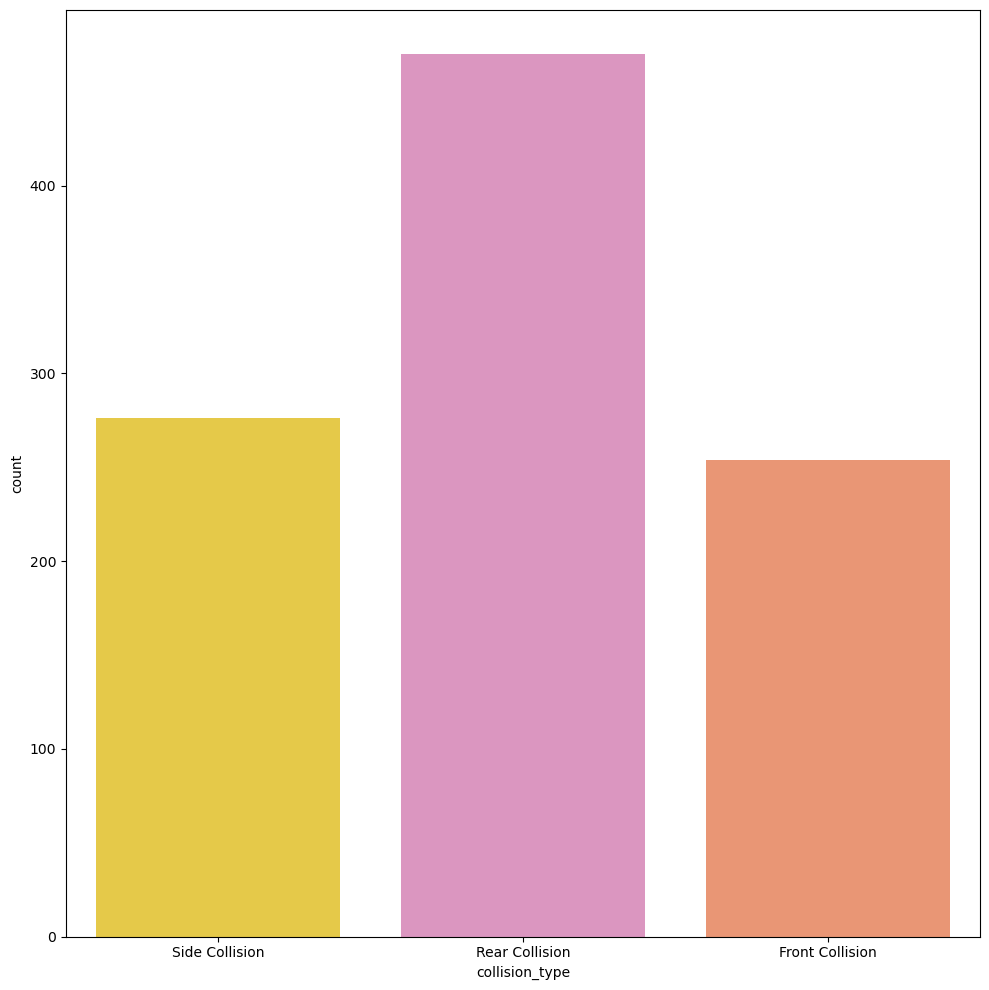

In [70]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='collision_type',palette='Set2_r')
plt.tight_layout()

# Countplot for Incident Severity

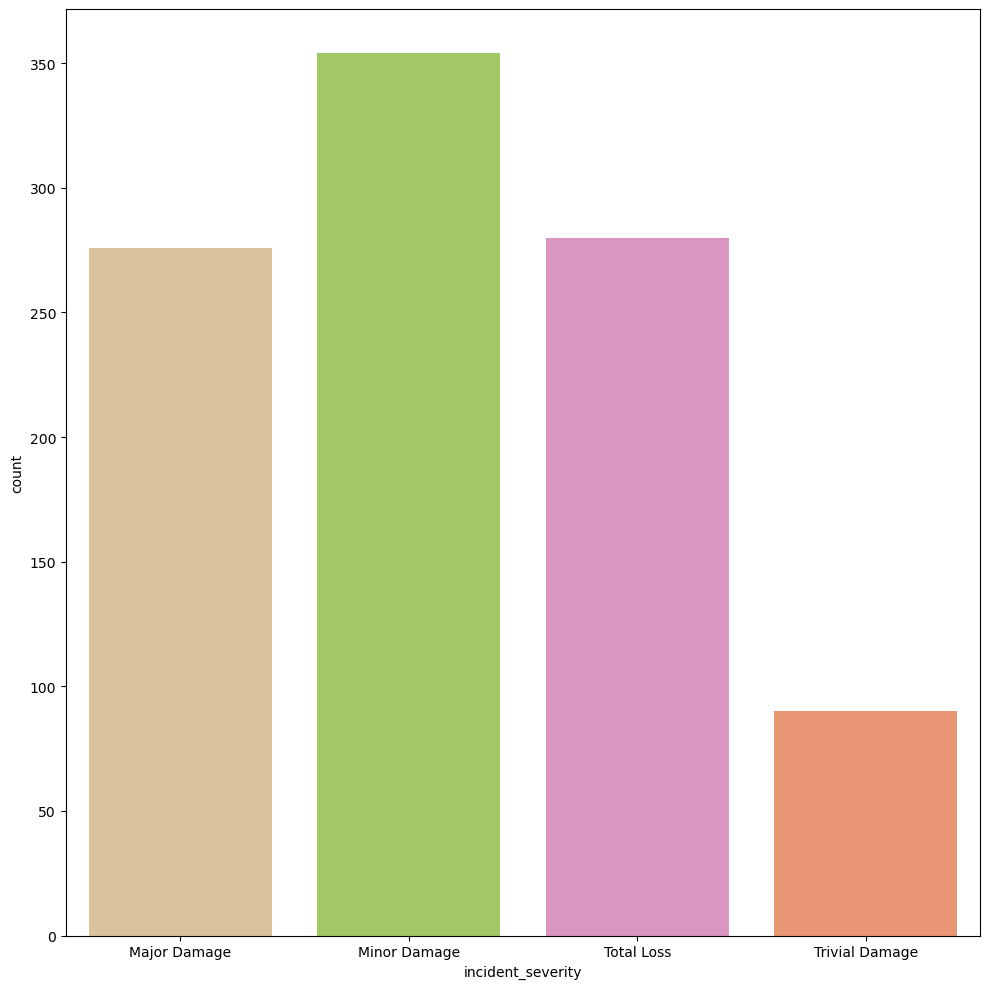

In [73]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='incident_severity',palette='Set2_r')
plt.tight_layout()

# Countplot for Authorities contacted

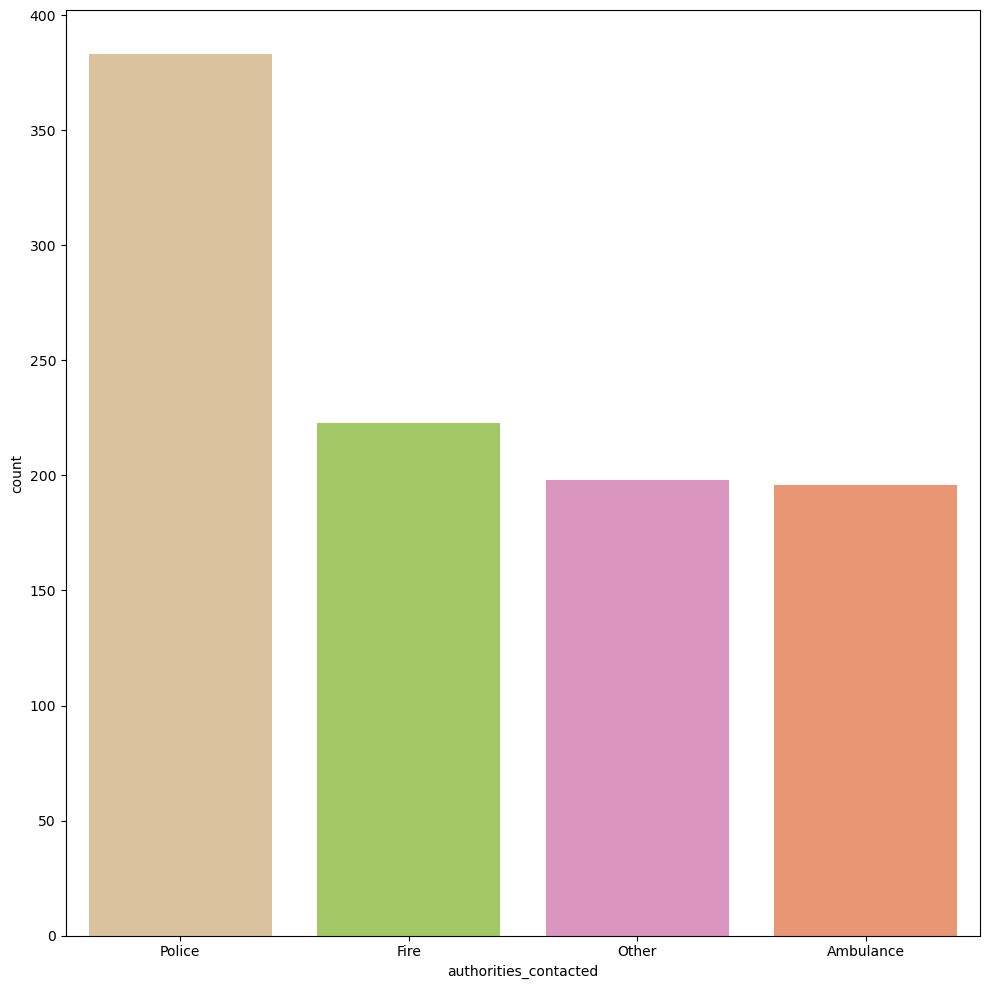

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='authorities_contacted',palette='Set2_r')
plt.tight_layout()

# Countplot for Incident state

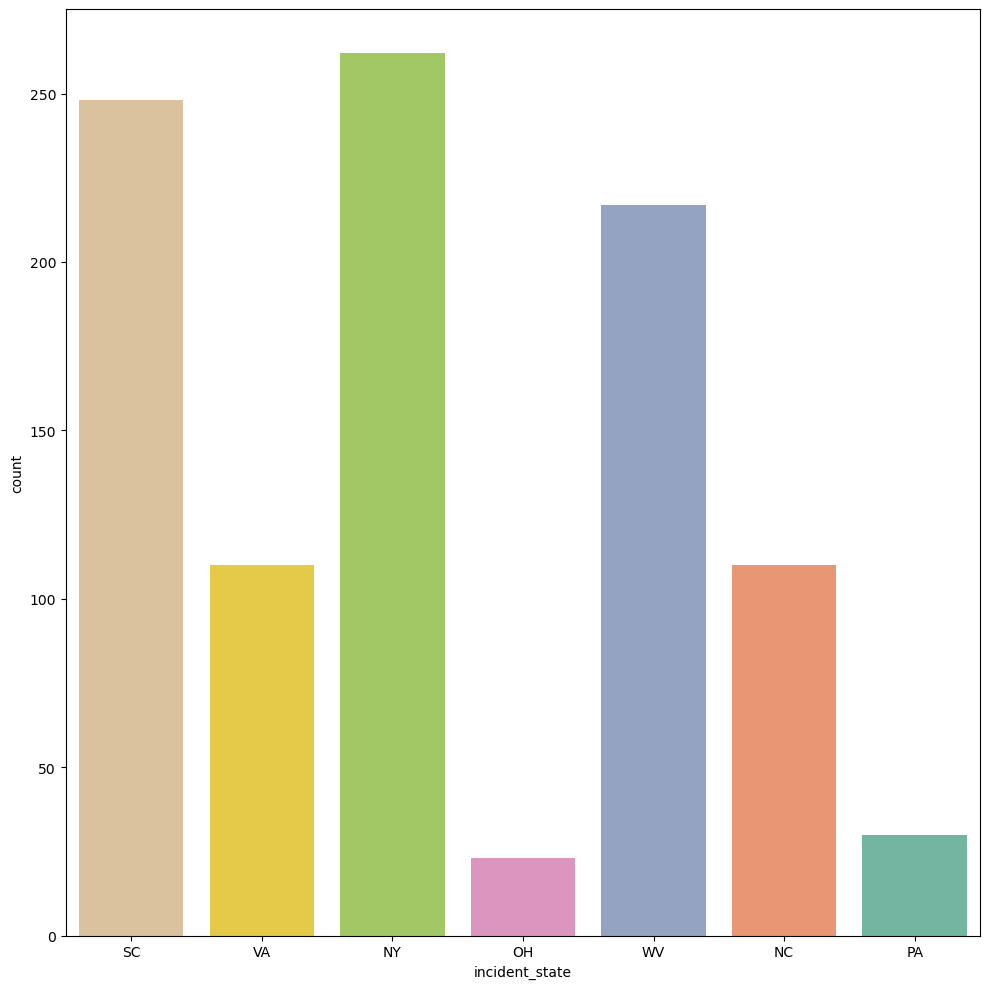

In [79]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='incident_state',palette='Set2_r')
plt.tight_layout()

# Countplot for number of vehicle involved in the accident

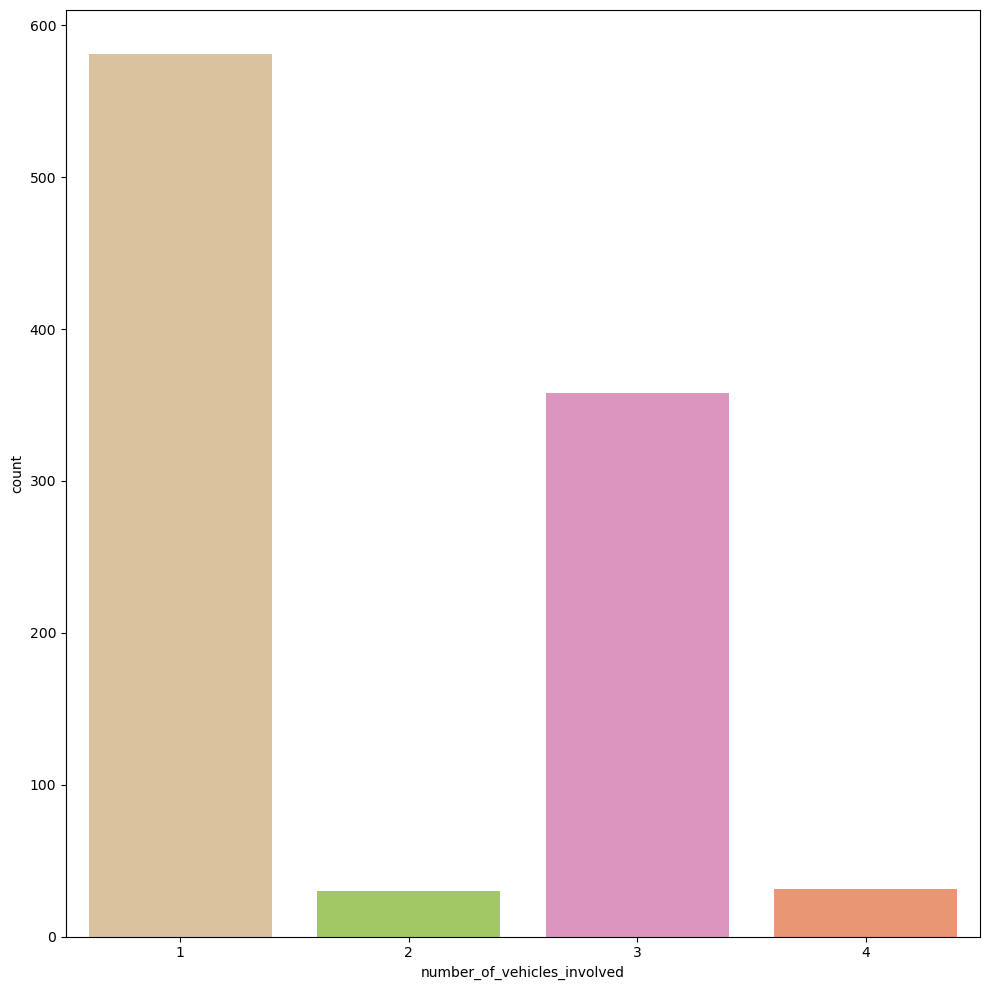

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='number_of_vehicles_involved',palette='Set2_r')
plt.tight_layout()

# Countplot for property damage

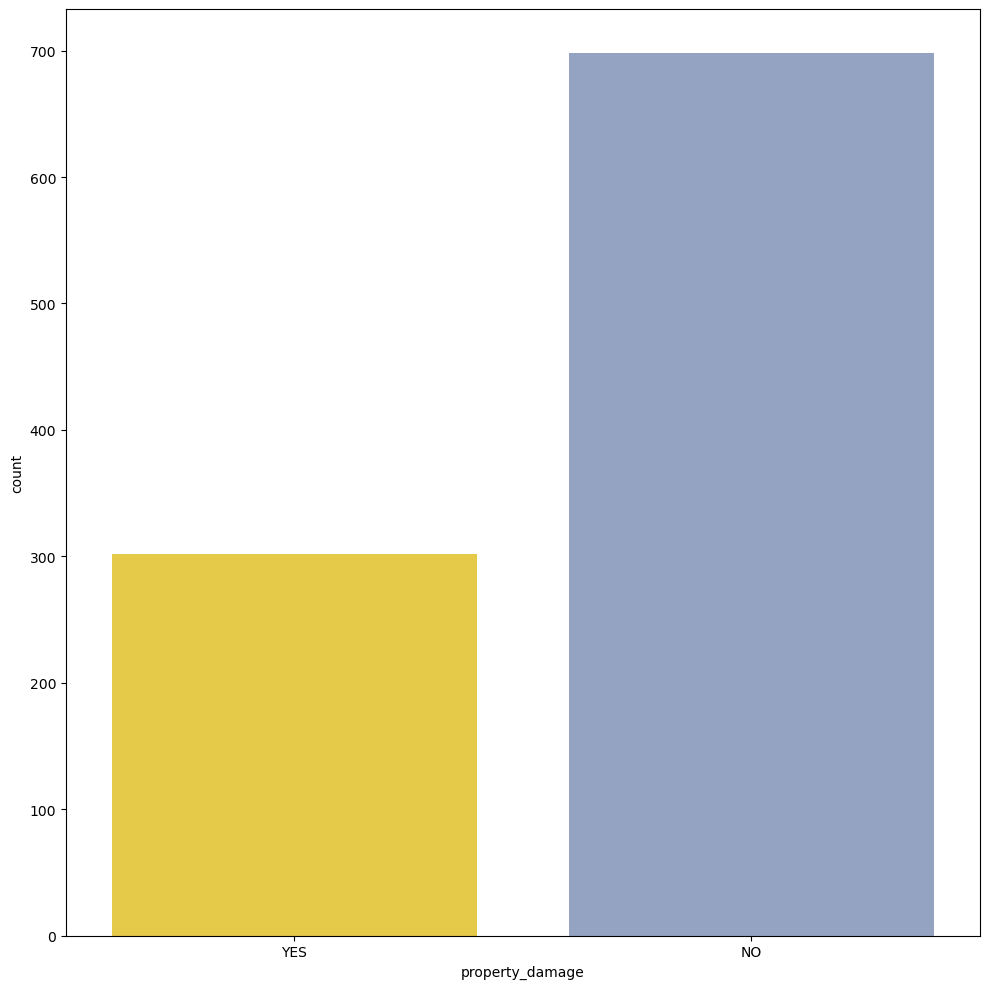

In [85]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='property_damage',palette='Set2_r')
plt.tight_layout()

# Countplot for injuries sustained

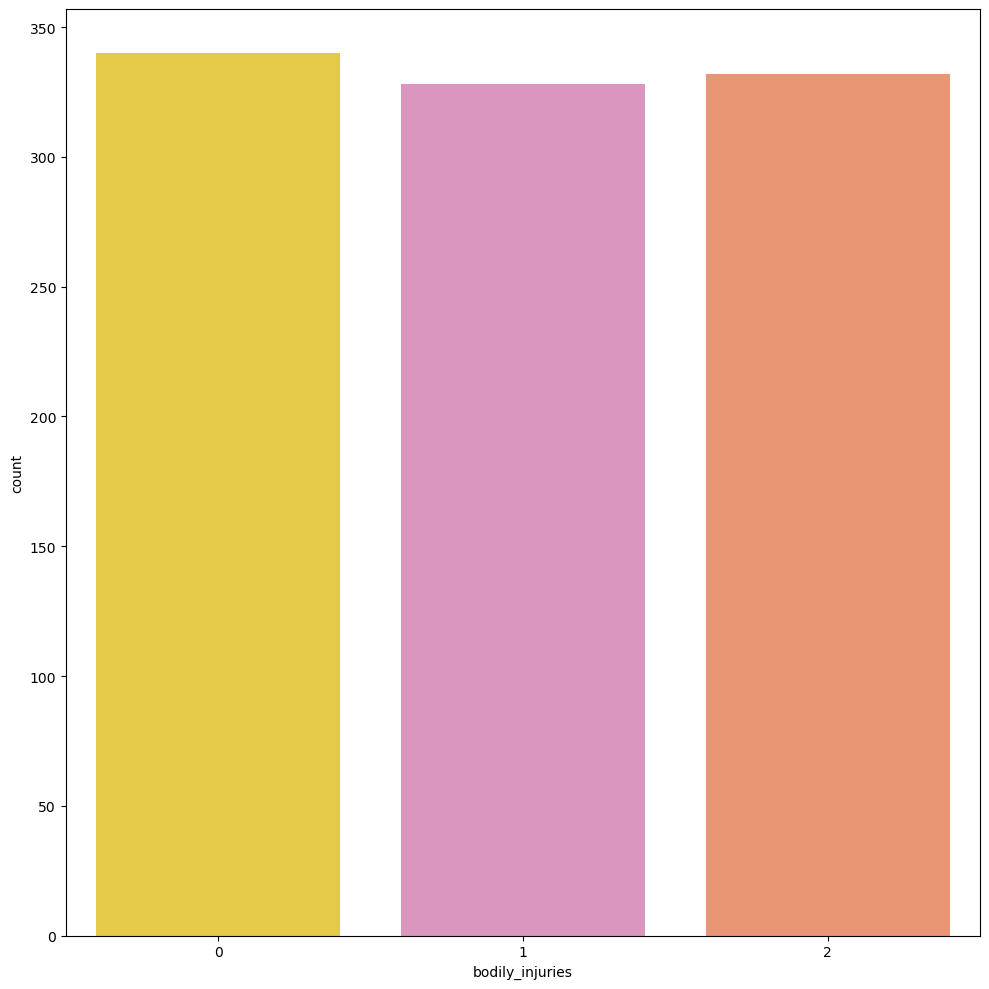

In [88]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='bodily_injuries',palette='Set2_r')
plt.tight_layout()

# Countplot for number of witnesses involved

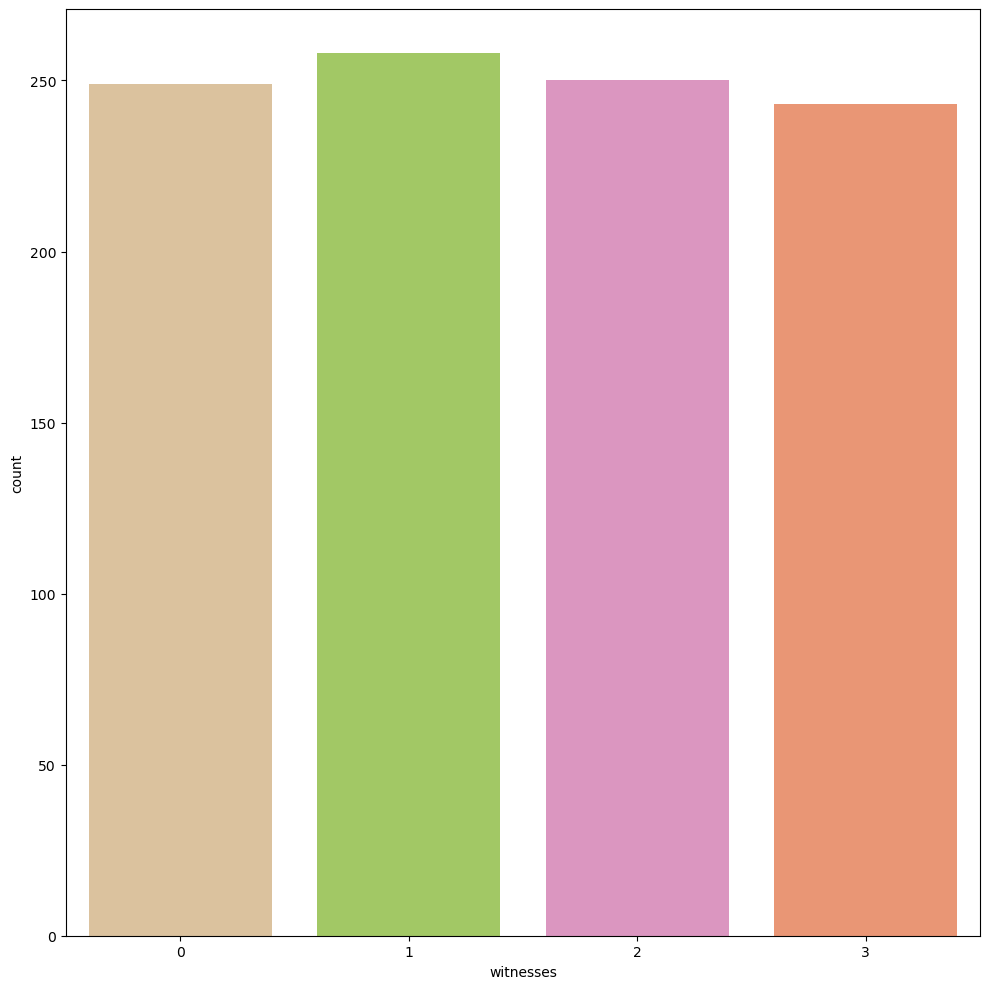

In [91]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='witnesses',palette='Set2_r')
plt.tight_layout()

# Countplot for the incident for which the police report available

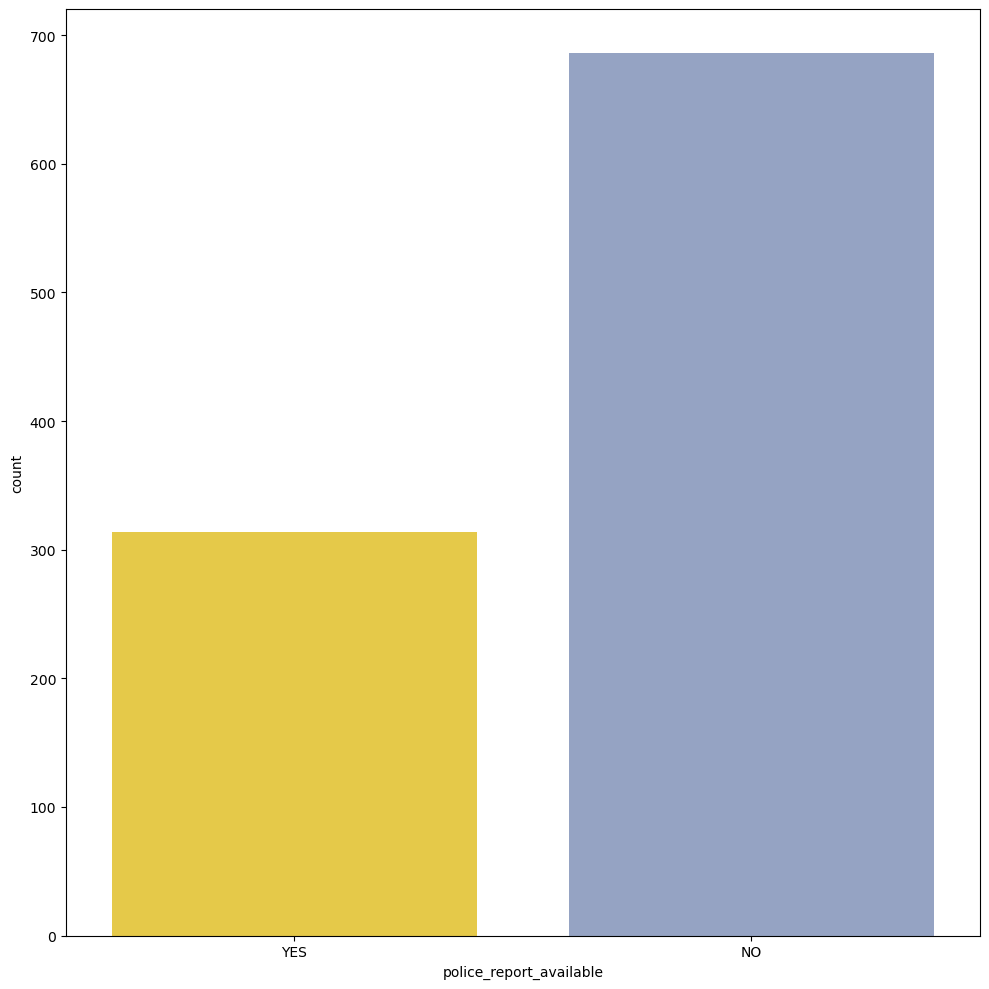

In [94]:
plt.figure(figsize=(10,10))
sns.countplot(insurancedf,x='police_report_available',palette='Set2_r')
plt.tight_layout()

# Multivariate Analysis

# Relationship between policy state and policy number for fraud reported or not using seaborn barplot

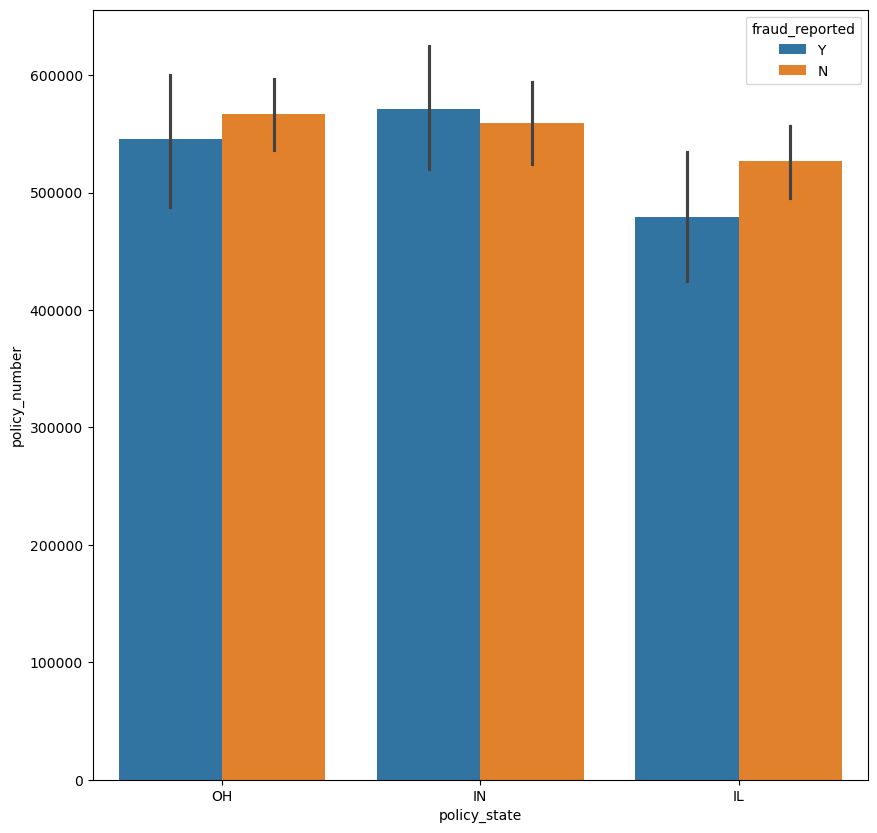

In [98]:
plt.figure(figsize=(10,10))
sns.barplot(insurancedf,x='policy_state',y='policy_number',hue='fraud_reported',dodge=True)
plt.show()

The output from the above plot shows that the fraud reported is more for the ploicy state from India with the policy number value between 55000 and 60000.

# Relationship between total insurance claim amount and fraud reported or not using seaborn barplot

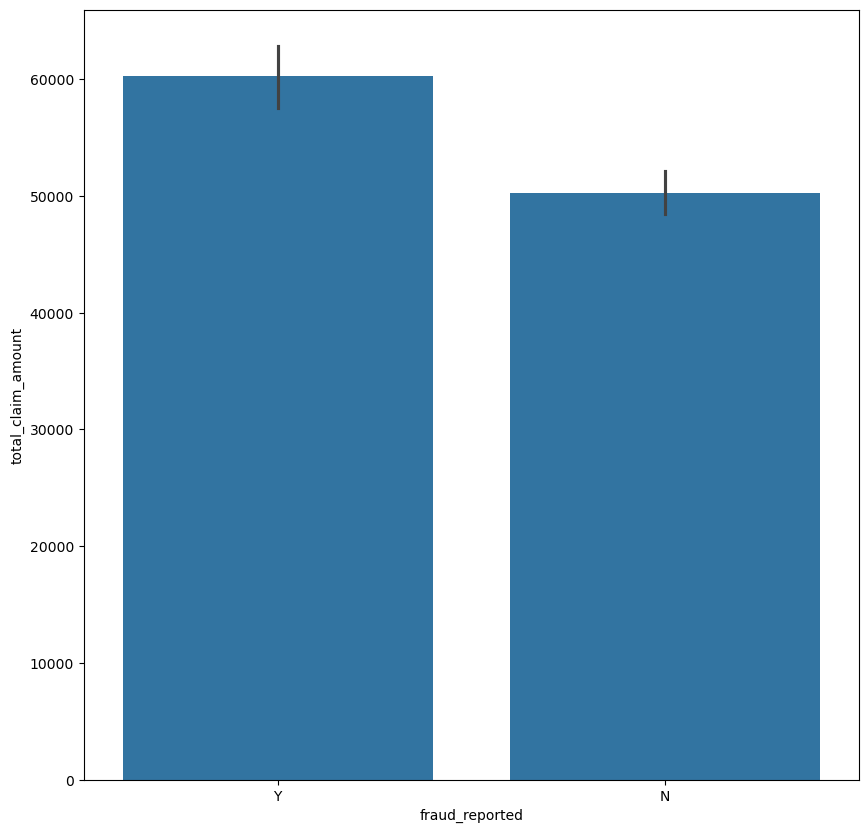

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(insurancedf,x='fraud_reported',y='total_claim_amount')
plt.show()

The output from the above plot shows that the fraud reported is higher with the total claim amount of 60000.

# Relationship between insurance claim amount for injuries sustained and fraud reported or not using seaborn barplot

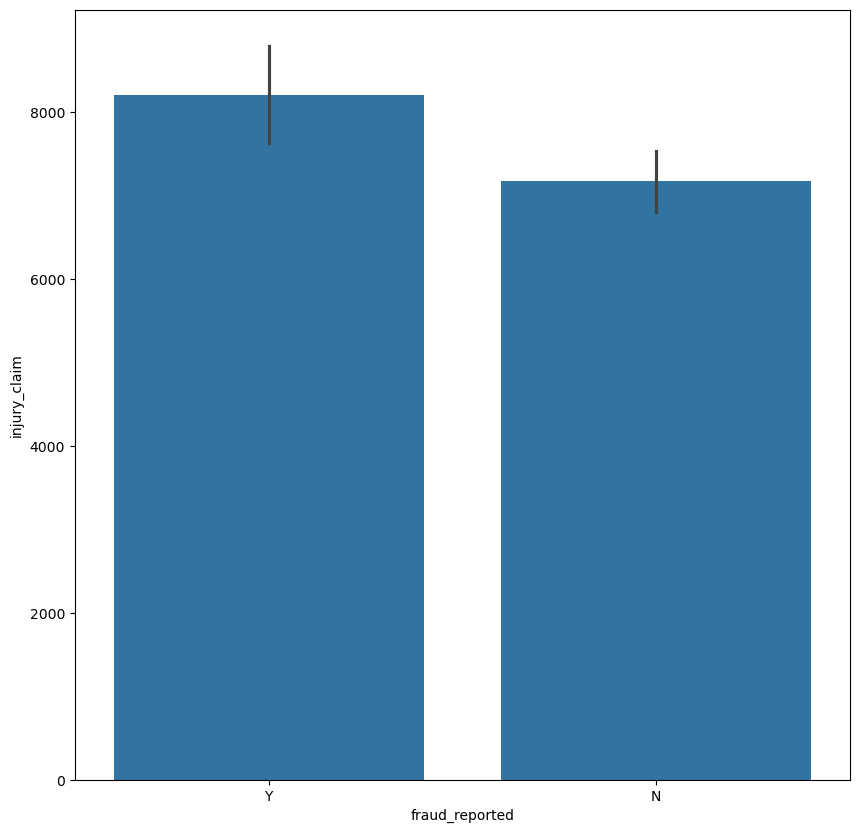

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(insurancedf,x='fraud_reported',y='injury_claim')
plt.show()

The relationship between injury claim and fraud reported shows that the injury claim amount for the fraud reported is higher value of 80000.

# Relationship between insurance claim amount for property damaged during incident and fraud reported or not using seaborn barplot

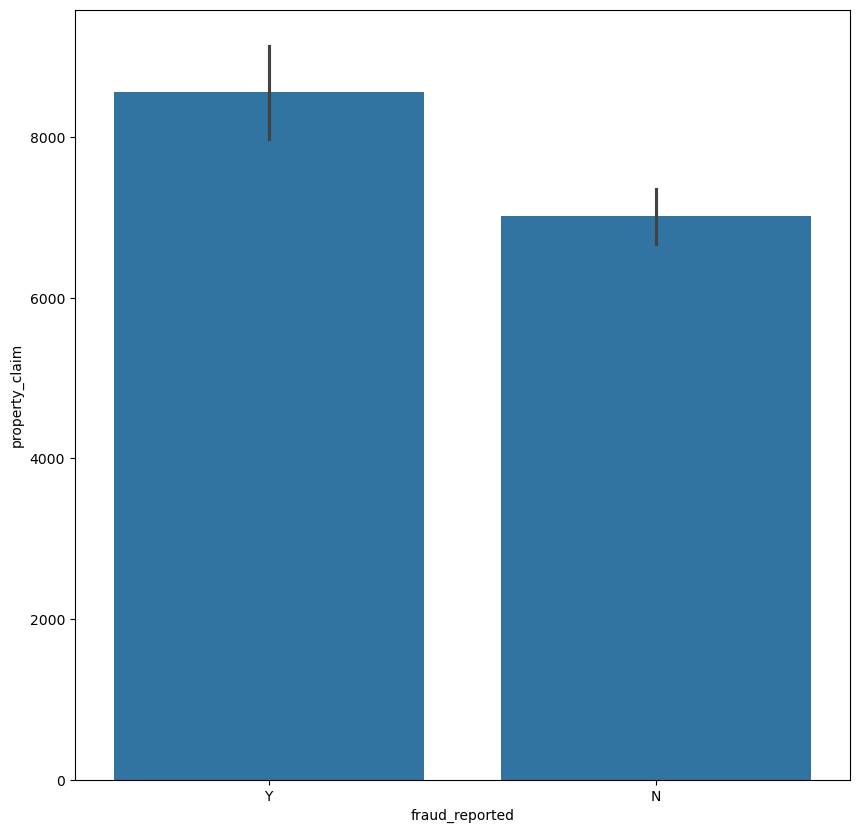

In [272]:
plt.figure(figsize=(10,10))
sns.barplot(insurancedf,x='fraud_reported',y='property_claim')
plt.show()

The output from the above plot shows that the fraud reported is higher with the property claim amount of 85000.

# Relationship between insurance claim amount for vehicle damaged during incident and fraud reported or not using seaborn barplot

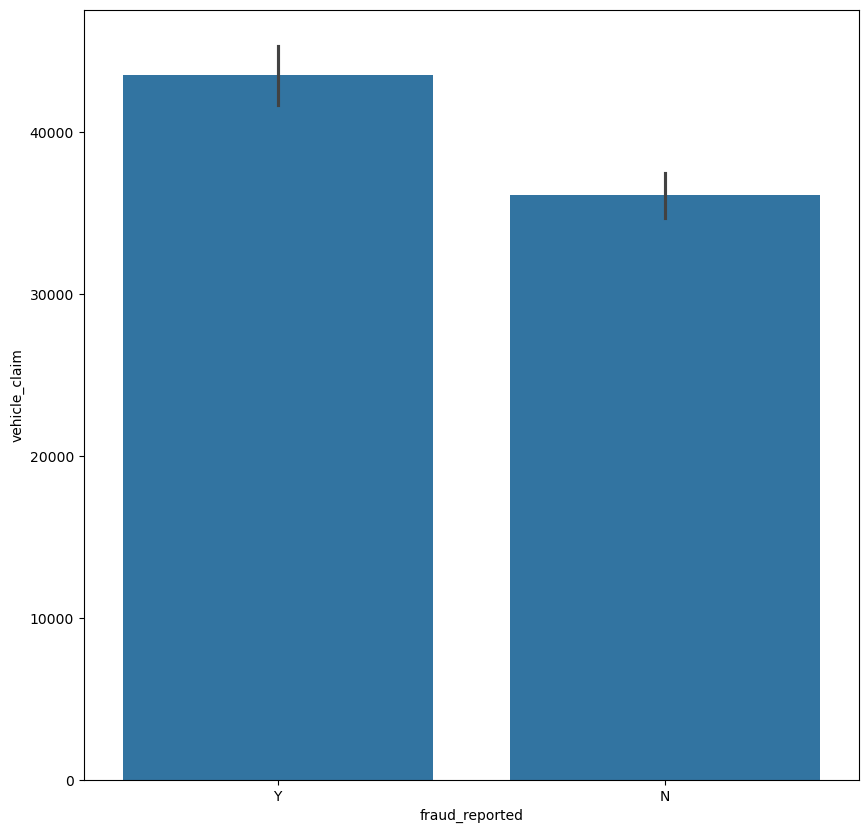

In [112]:
plt.figure(figsize=(10,10))
sns.barplot(insurancedf,x='fraud_reported',y='vehicle_claim')
plt.show()

The output from the above plot shows that the fraud reported is higher with the vehicle claim amount of 60000.

# Encode the categorical columns in the dataset using sklearn LabelEncoder

In [116]:
columns_to_encode=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
le=LabelEncoder()
insurancedf[columns_to_encode]=insurancedf[columns_to_encode].apply(le.fit_transform)

In [118]:
insurancedf['policy_bind_date']=pd.to_datetime(insurancedf['policy_bind_date']).astype('int64')/1e9
insurancedf['incident_date']=pd.to_datetime(insurancedf['incident_date']).astype('int64')/1e9

In [120]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   float64
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [122]:
insurancedf.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,1.413504e+09,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,1.151366e+09,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,9.681984e+08,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,6.435936e+08,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,1.402013e+09,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


# Display the statistical summary of the dataset using pandas describe method

In [125]:
insurancedf.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1.013143e+09,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,2.321970e+08,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,6.317568e+08,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,8.114688e+08,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1.017662e+09,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,1.208779e+09,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,1.424563e+09,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


The output of the summary statistics shows that:

1, The count for all the columns are same i.e 1000 shows that there are no null records present in the dataset.

2, The value of mean is nearly equals the 50th percentile (median) and there are little amount of skewness present in the dataset.

3, The maximum value is higher than the value of 75th percentile shows that there are outliers present in the dataset for the columns 'months_as_customer', 'age', 'policy_number', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'.

# Correlation for different features in the dataset using pandas corr method

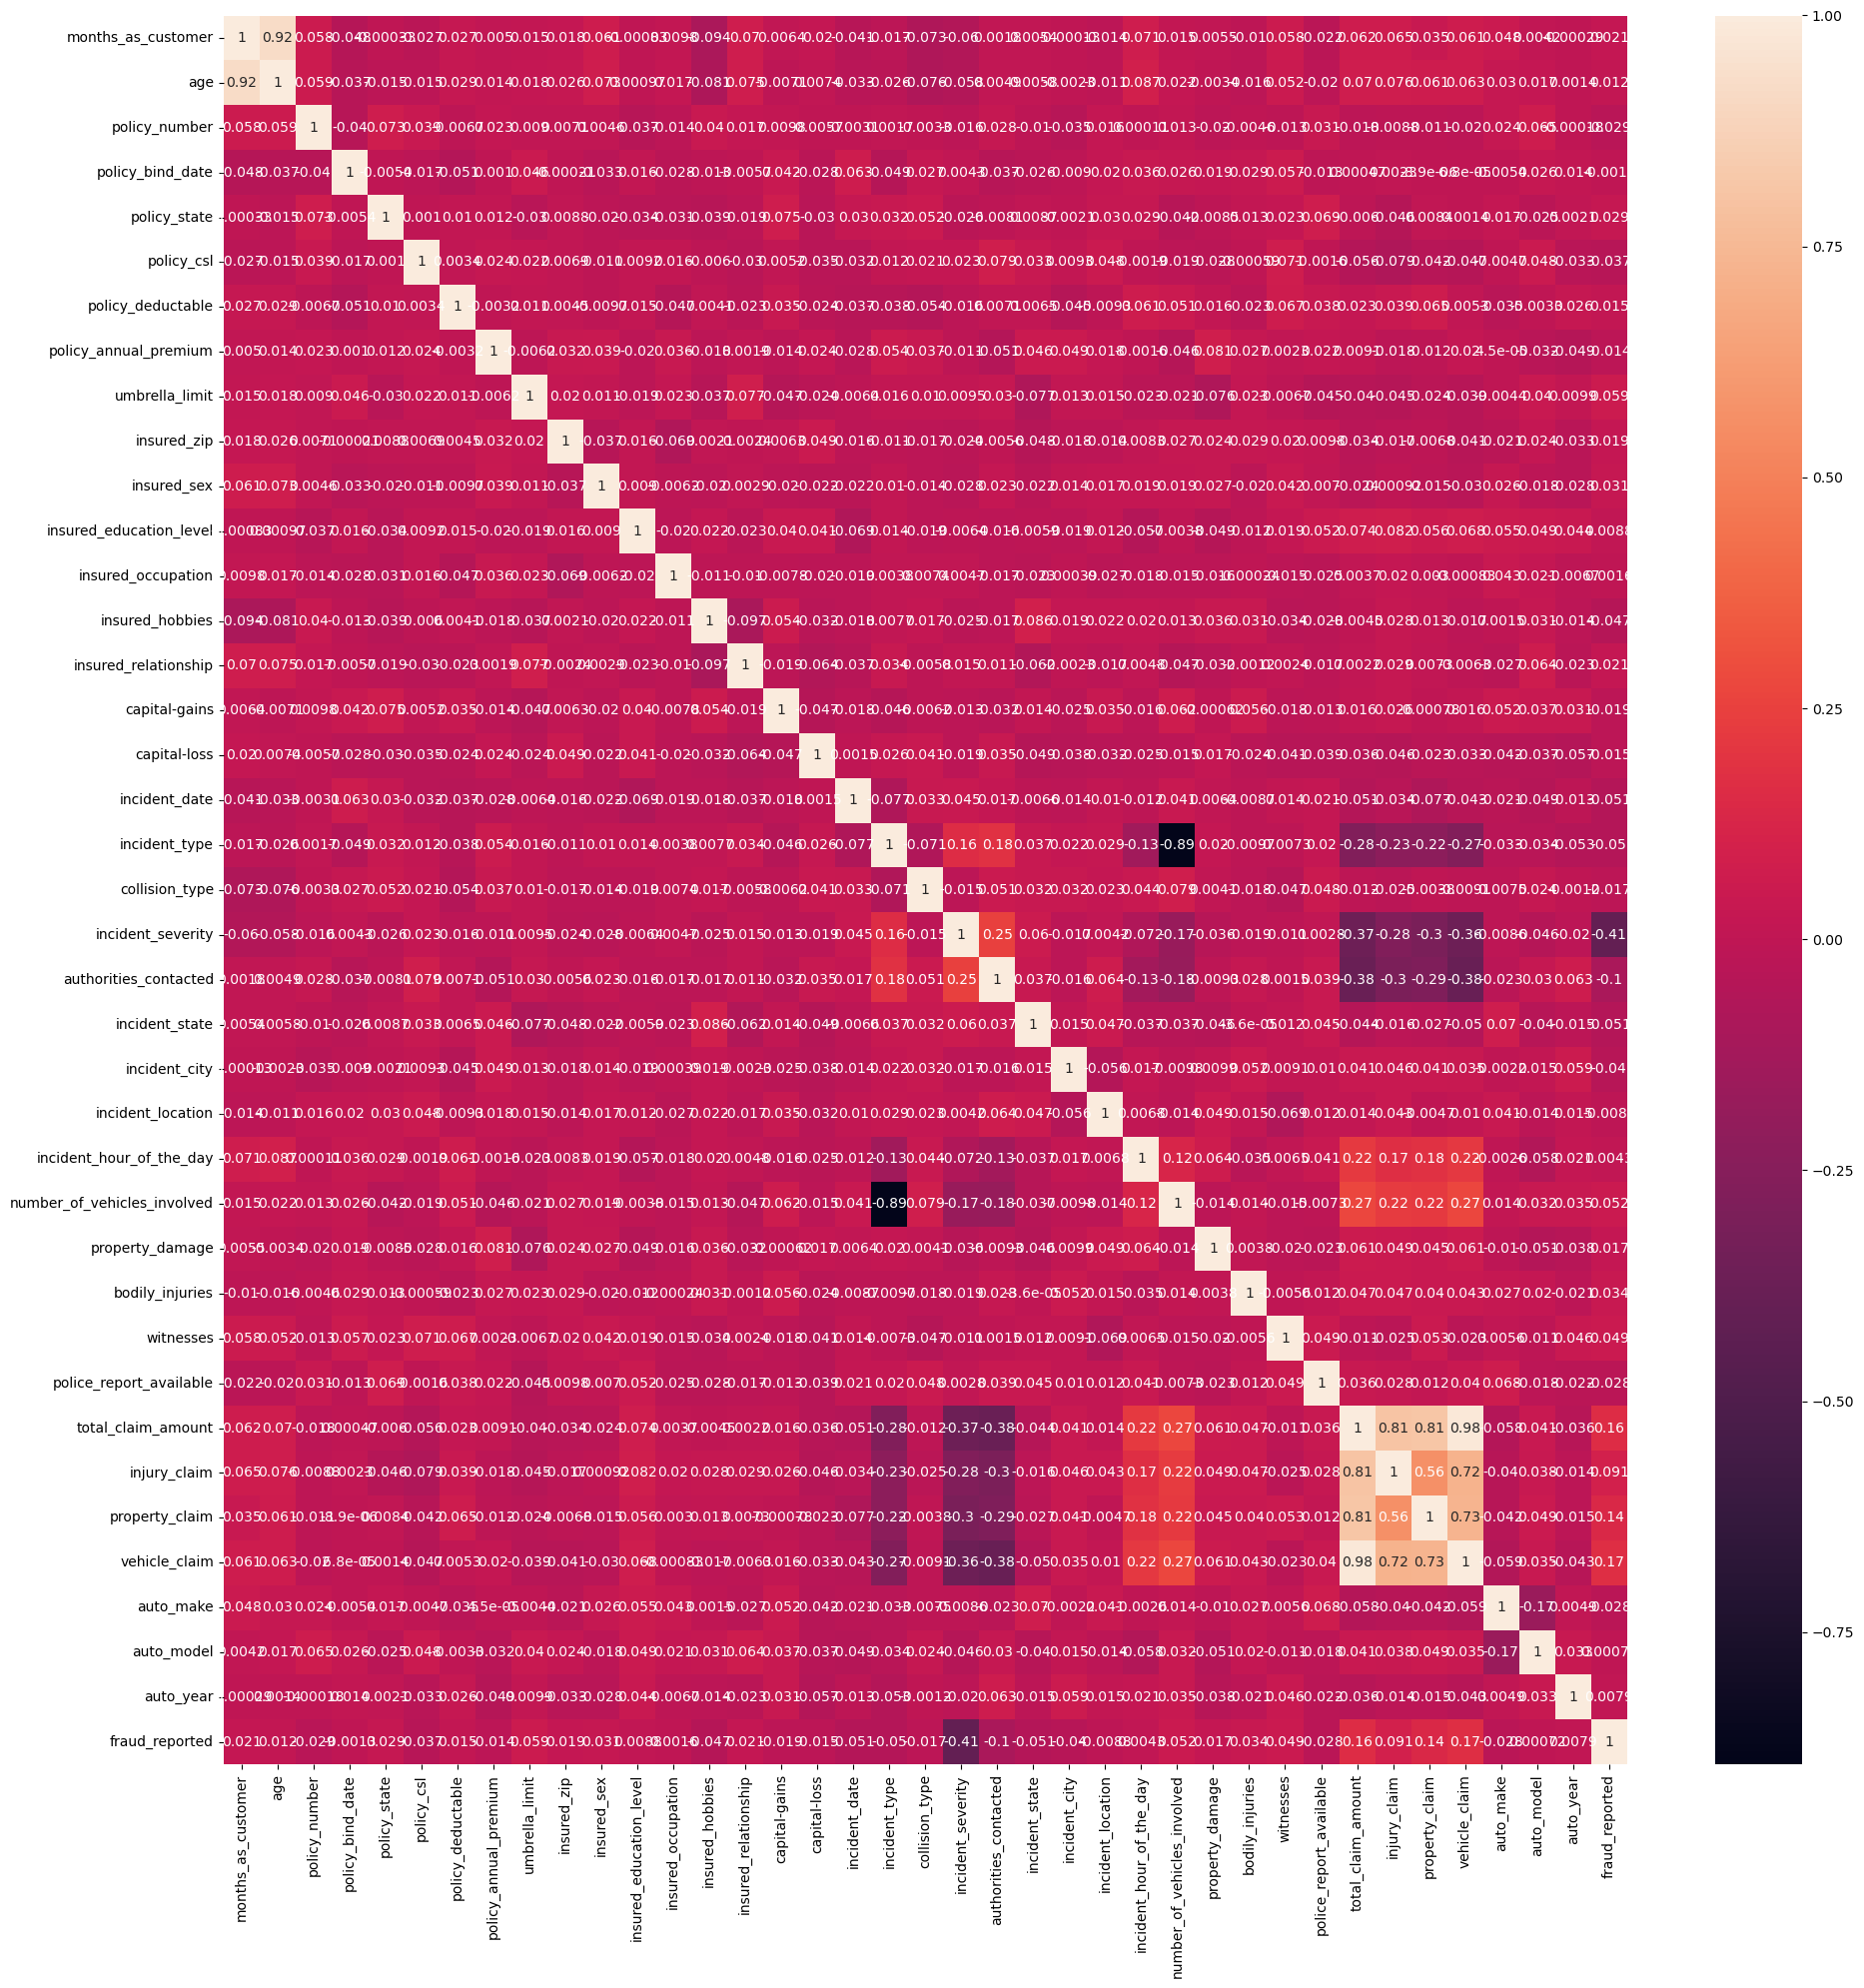

In [129]:
insurance_corr=insurancedf.corr()
plt.figure(figsize=(20,20))
sns.heatmap(insurance_corr,annot=True)
plt.tight_layout()

The output from the heatmap provides the below information

1, The columns 'total_claim_amount', 'injury_claim', 'property_claim' and 'vehicle_claim' are positively correlated with each other.

2, The columns 'months_as_customer' and 'age' are positively correlated with each other.

3, The column 'incident_severity is negatively correlated with the column 'fraud_reported'.

# Check for the skewness in the dataset using seaborn distplot

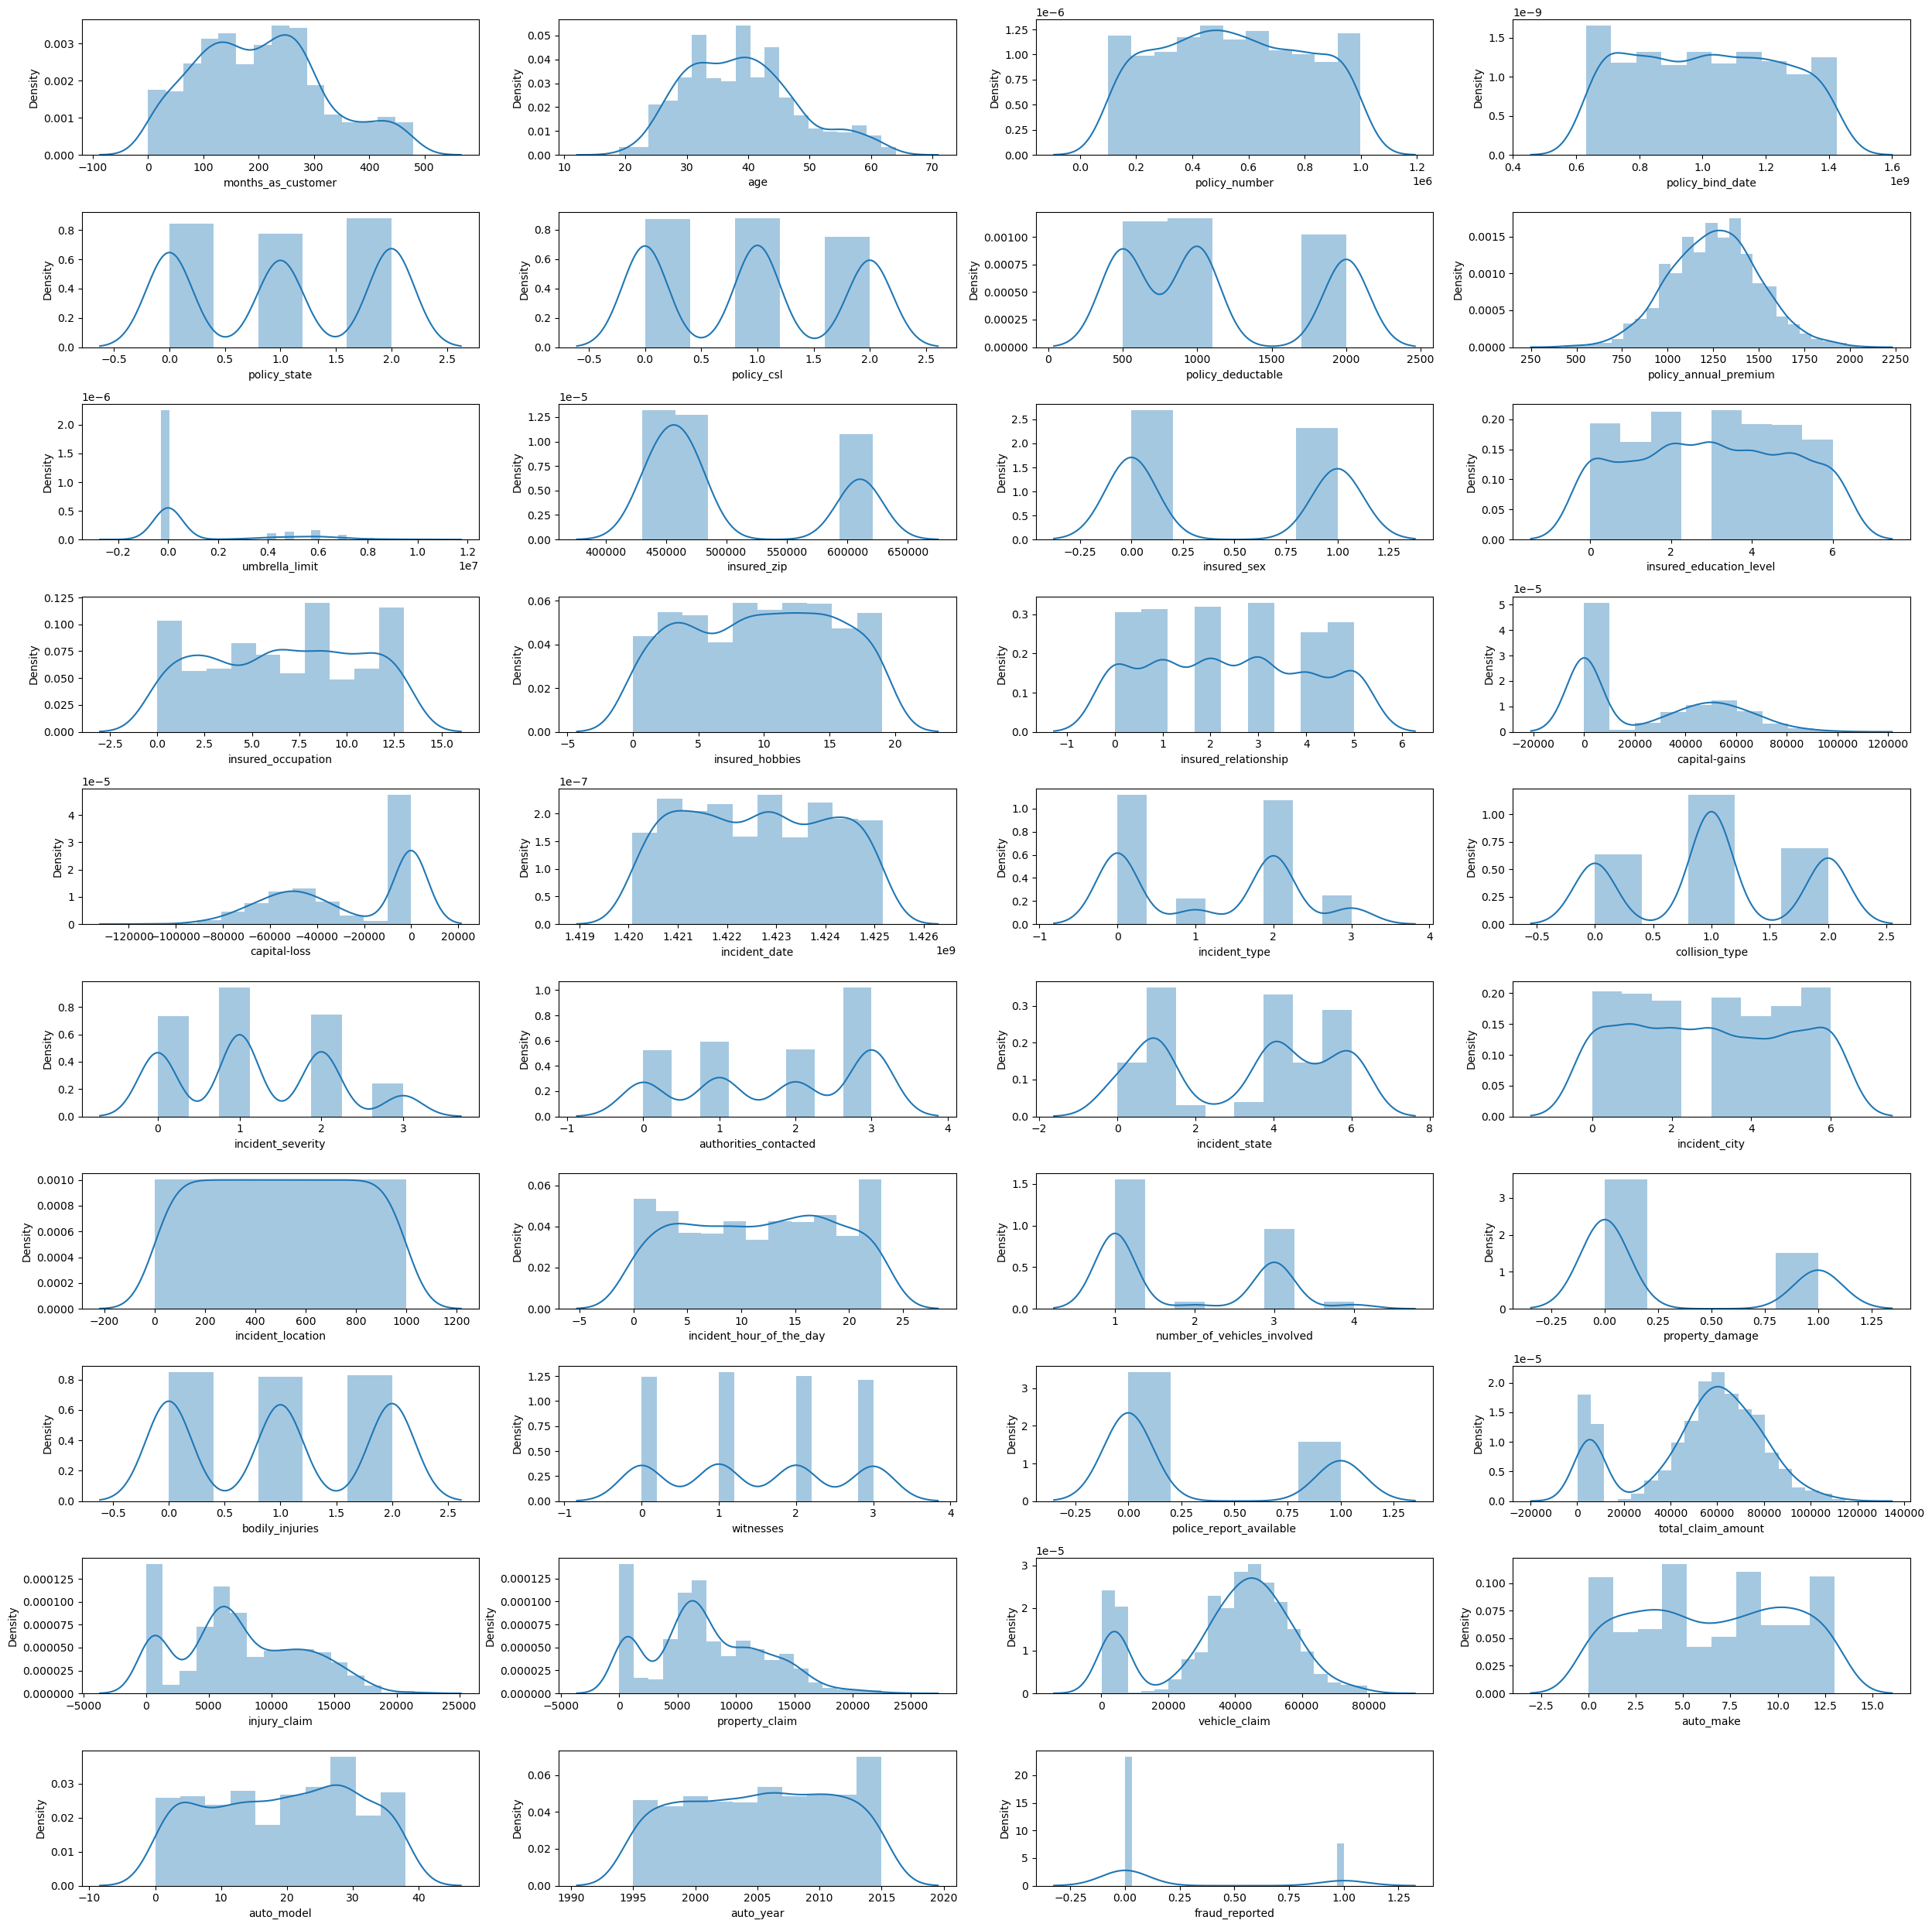

In [133]:
plt.figure(figsize=(25,25))
p=1
for i in insurancedf:
    if p<=40:
        plt.subplot(10,4,p)
        sns.distplot(insurancedf[i])
    p=p+1
plt.tight_layout()

# Check for the skewness in the dataset using skew method

In [136]:
insurancedf.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.052731
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.026227
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [138]:
insurancedf['umbrella_limit']=np.cbrt(insurancedf['umbrella_limit'])
insurancedf['insured_zip']=np.cbrt(insurancedf['insured_zip'])
insurancedf['property_damage']=np.cbrt(insurancedf['property_damage'])
insurancedf['fraud_reported']=np.cbrt(insurancedf['fraud_reported'])

In [140]:
insurancedf.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.052731
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.794586
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.026227
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


# Check for the outliers in the dataset using seaborn boxplot

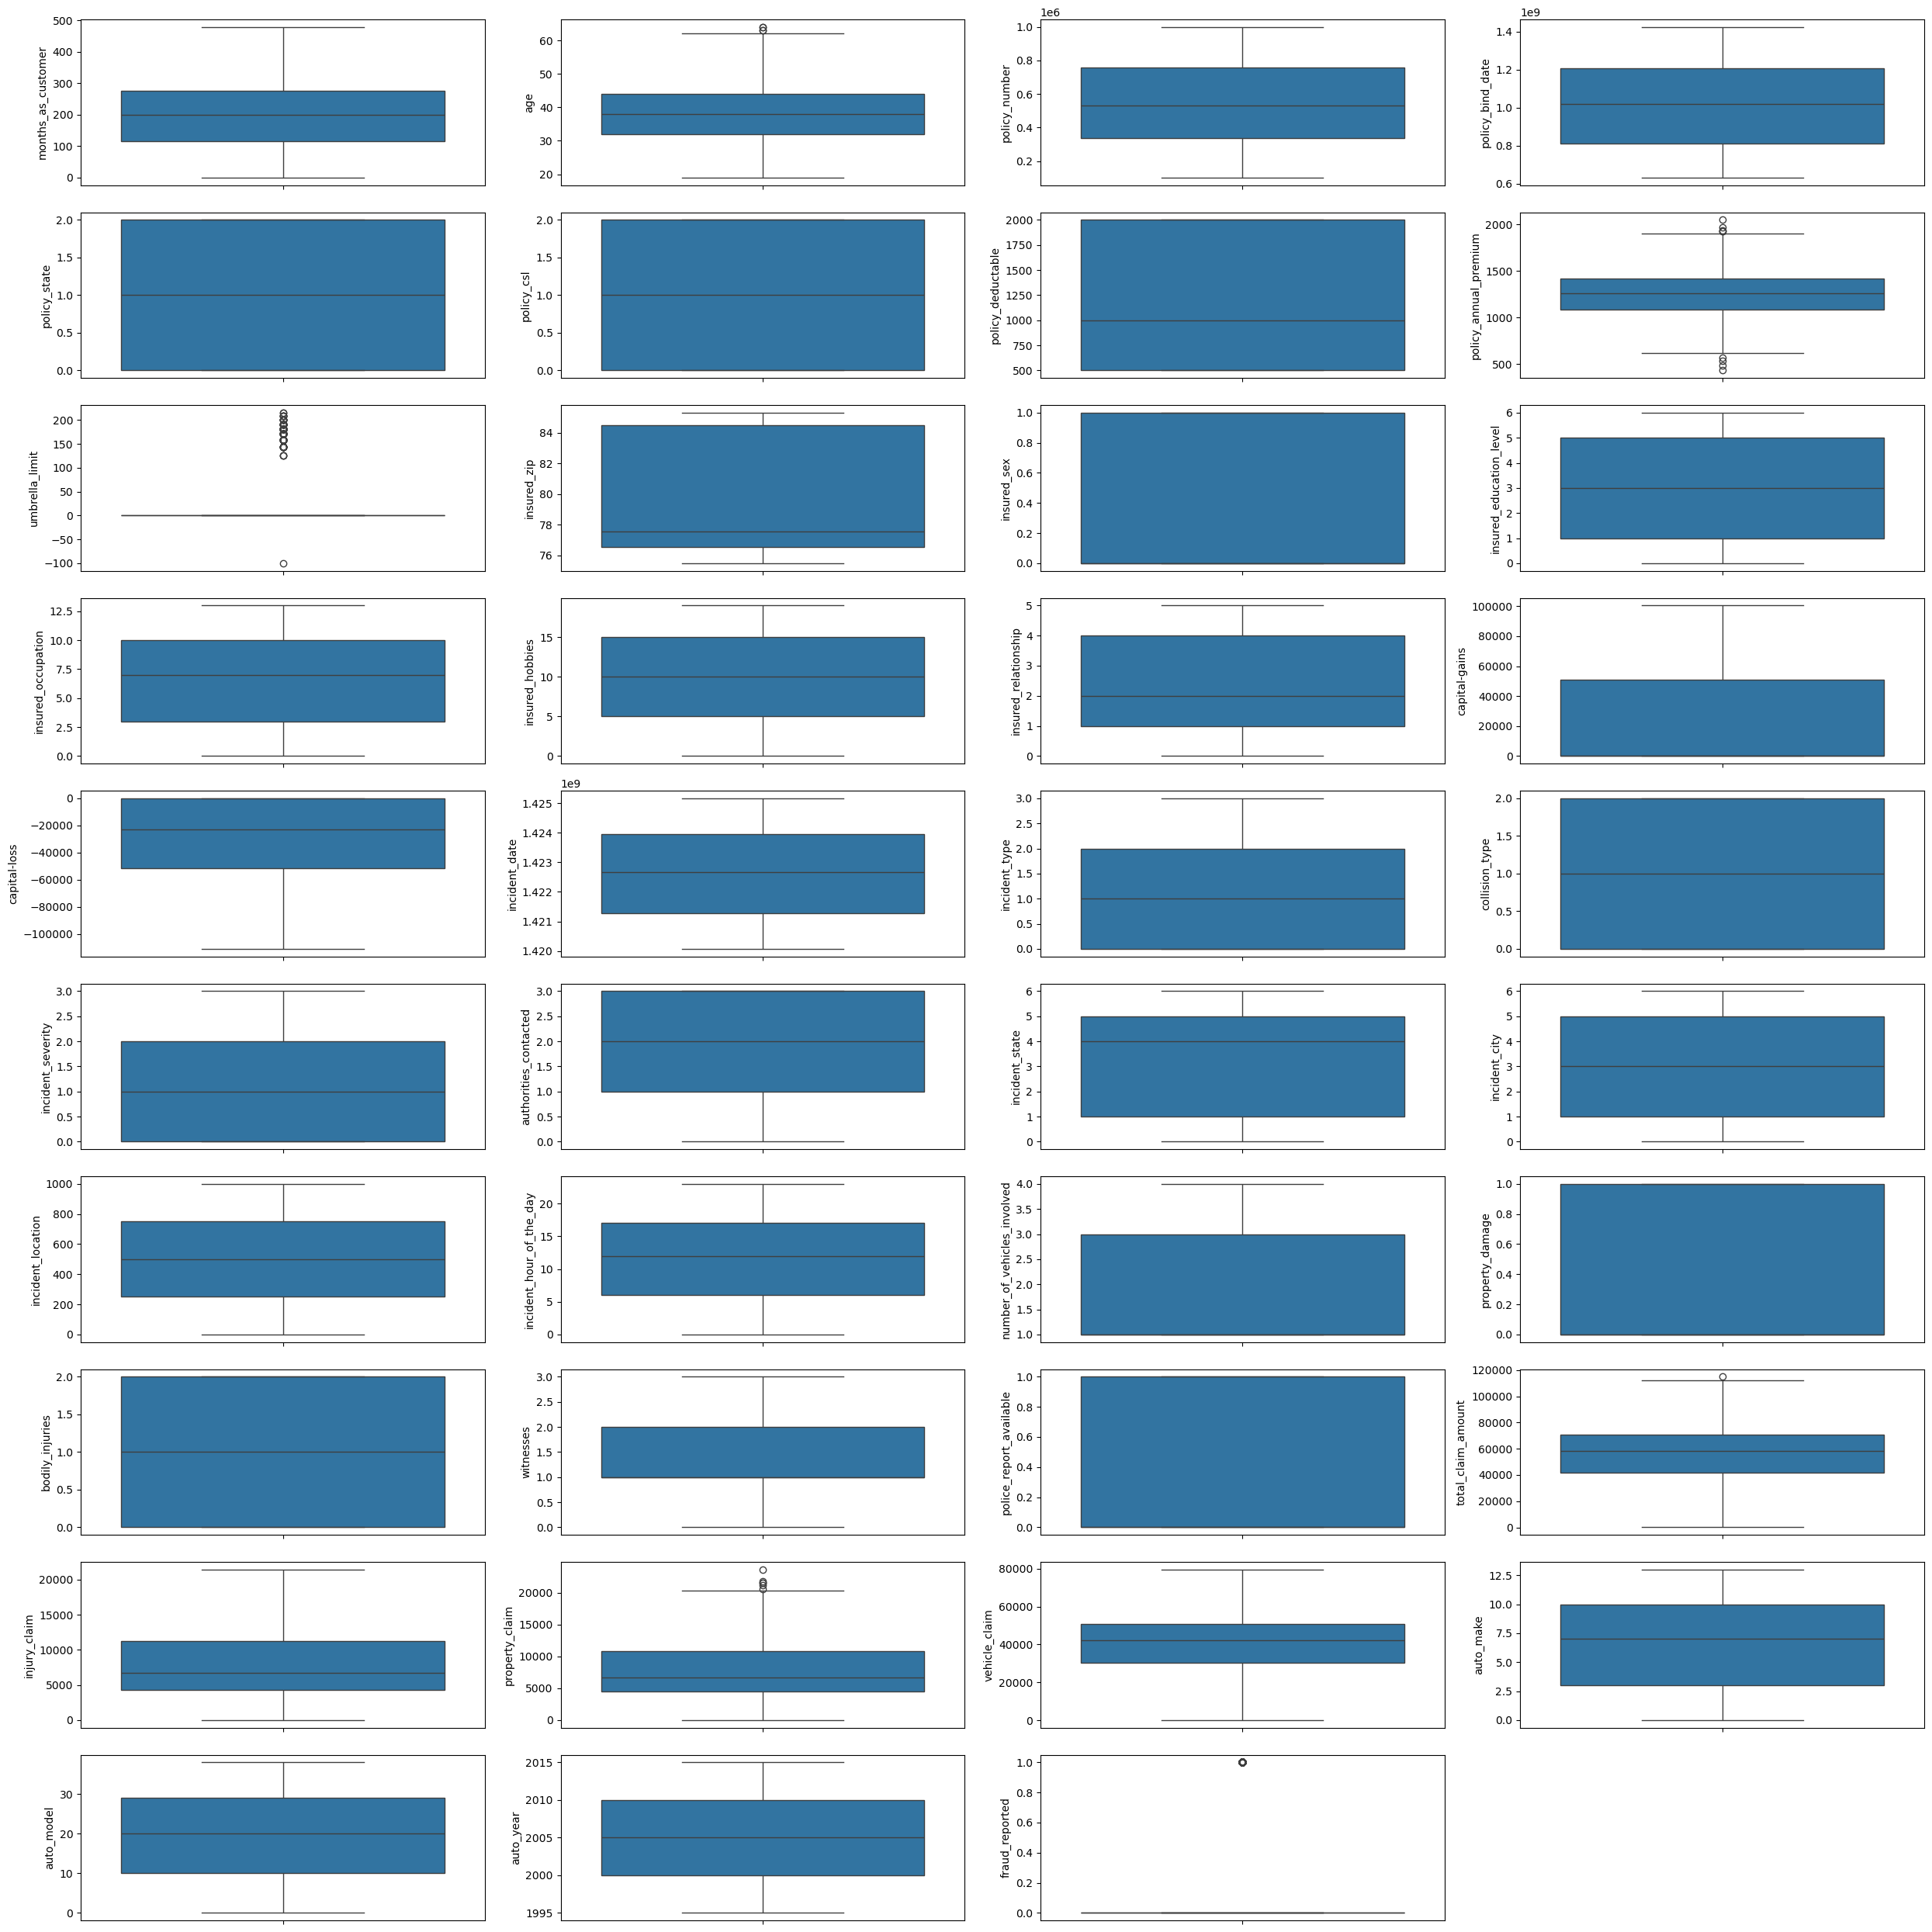

In [143]:
plt.figure(figsize=(25,25))
p=1
for i in insurancedf:
    if p<=40:
        plt.subplot(10,4,p)
        sns.boxplot(insurancedf[i])
    p=p+1
plt.tight_layout()

# Detect and remove the outliers in the dataset using zscore

In [146]:
z=np.abs(zscore(insurancedf))
z

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.078140,0.990836,0.095953,1.725092,1.187173,0.060937,0.222383,0.616705,0.496576,0.471620,...,0.461838,1.478078,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019
1,0.208995,0.334073,0.791527,0.595582,0.016856,0.060937,1.412784,0.242521,1.926648,0.440722,...,1.338700,0.676554,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019
2,0.608002,1.088913,0.550566,0.193660,1.187173,1.182668,1.412784,0.642233,1.926648,1.023277,...,1.362107,0.676554,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731
3,0.452355,0.224613,1.239334,1.592332,1.220886,0.060937,1.412784,0.652886,2.078484,1.490328,...,0.461838,0.676554,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019
4,0.208995,0.552994,0.695834,1.675578,1.220886,1.304542,0.222383,1.341980,2.078484,1.523108,...,0.438431,0.676554,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,1.437089,1.187173,1.304542,0.222383,0.222884,0.496576,1.012797,...,0.438431,0.676554,1.305049,2.051155,0.273817,1.224309,0.135388,1.196528,0.149180,0.572731
996,0.704407,0.224613,1.398429,1.618991,1.220886,1.182668,0.222383,0.739141,0.496576,1.491089,...,1.362107,0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,0.572731
997,0.642767,0.541611,1.448920,0.139162,1.187173,0.060937,1.039966,0.520739,1.547250,0.830934,...,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,0.028570,1.513924,0.572731
998,2.208028,2.523284,0.047867,1.328982,1.220886,1.304542,1.412784,0.411866,1.926648,0.847913,...,0.438431,1.478078,0.219110,0.453708,0.451976,0.073580,1.375206,1.286371,1.181303,0.572731


In [148]:
np.where(z>=3)

(array([229, 248, 500, 763, 807], dtype=int64),
 array([ 7,  7, 33,  7, 16], dtype=int64))

In [150]:
insurance_df=insurancedf[(z<3).all(axis=1)]

In [152]:
insurancedf.shape

(1000, 39)

In [154]:
insurance_df.shape

(995, 39)

In [156]:
print("Precentage of data loss",((insurancedf.shape[0]-insurance_df.shape[0])/insurancedf.shape[0])*100)

Precentage of data loss 0.5


# Outliers are removed from the dataset

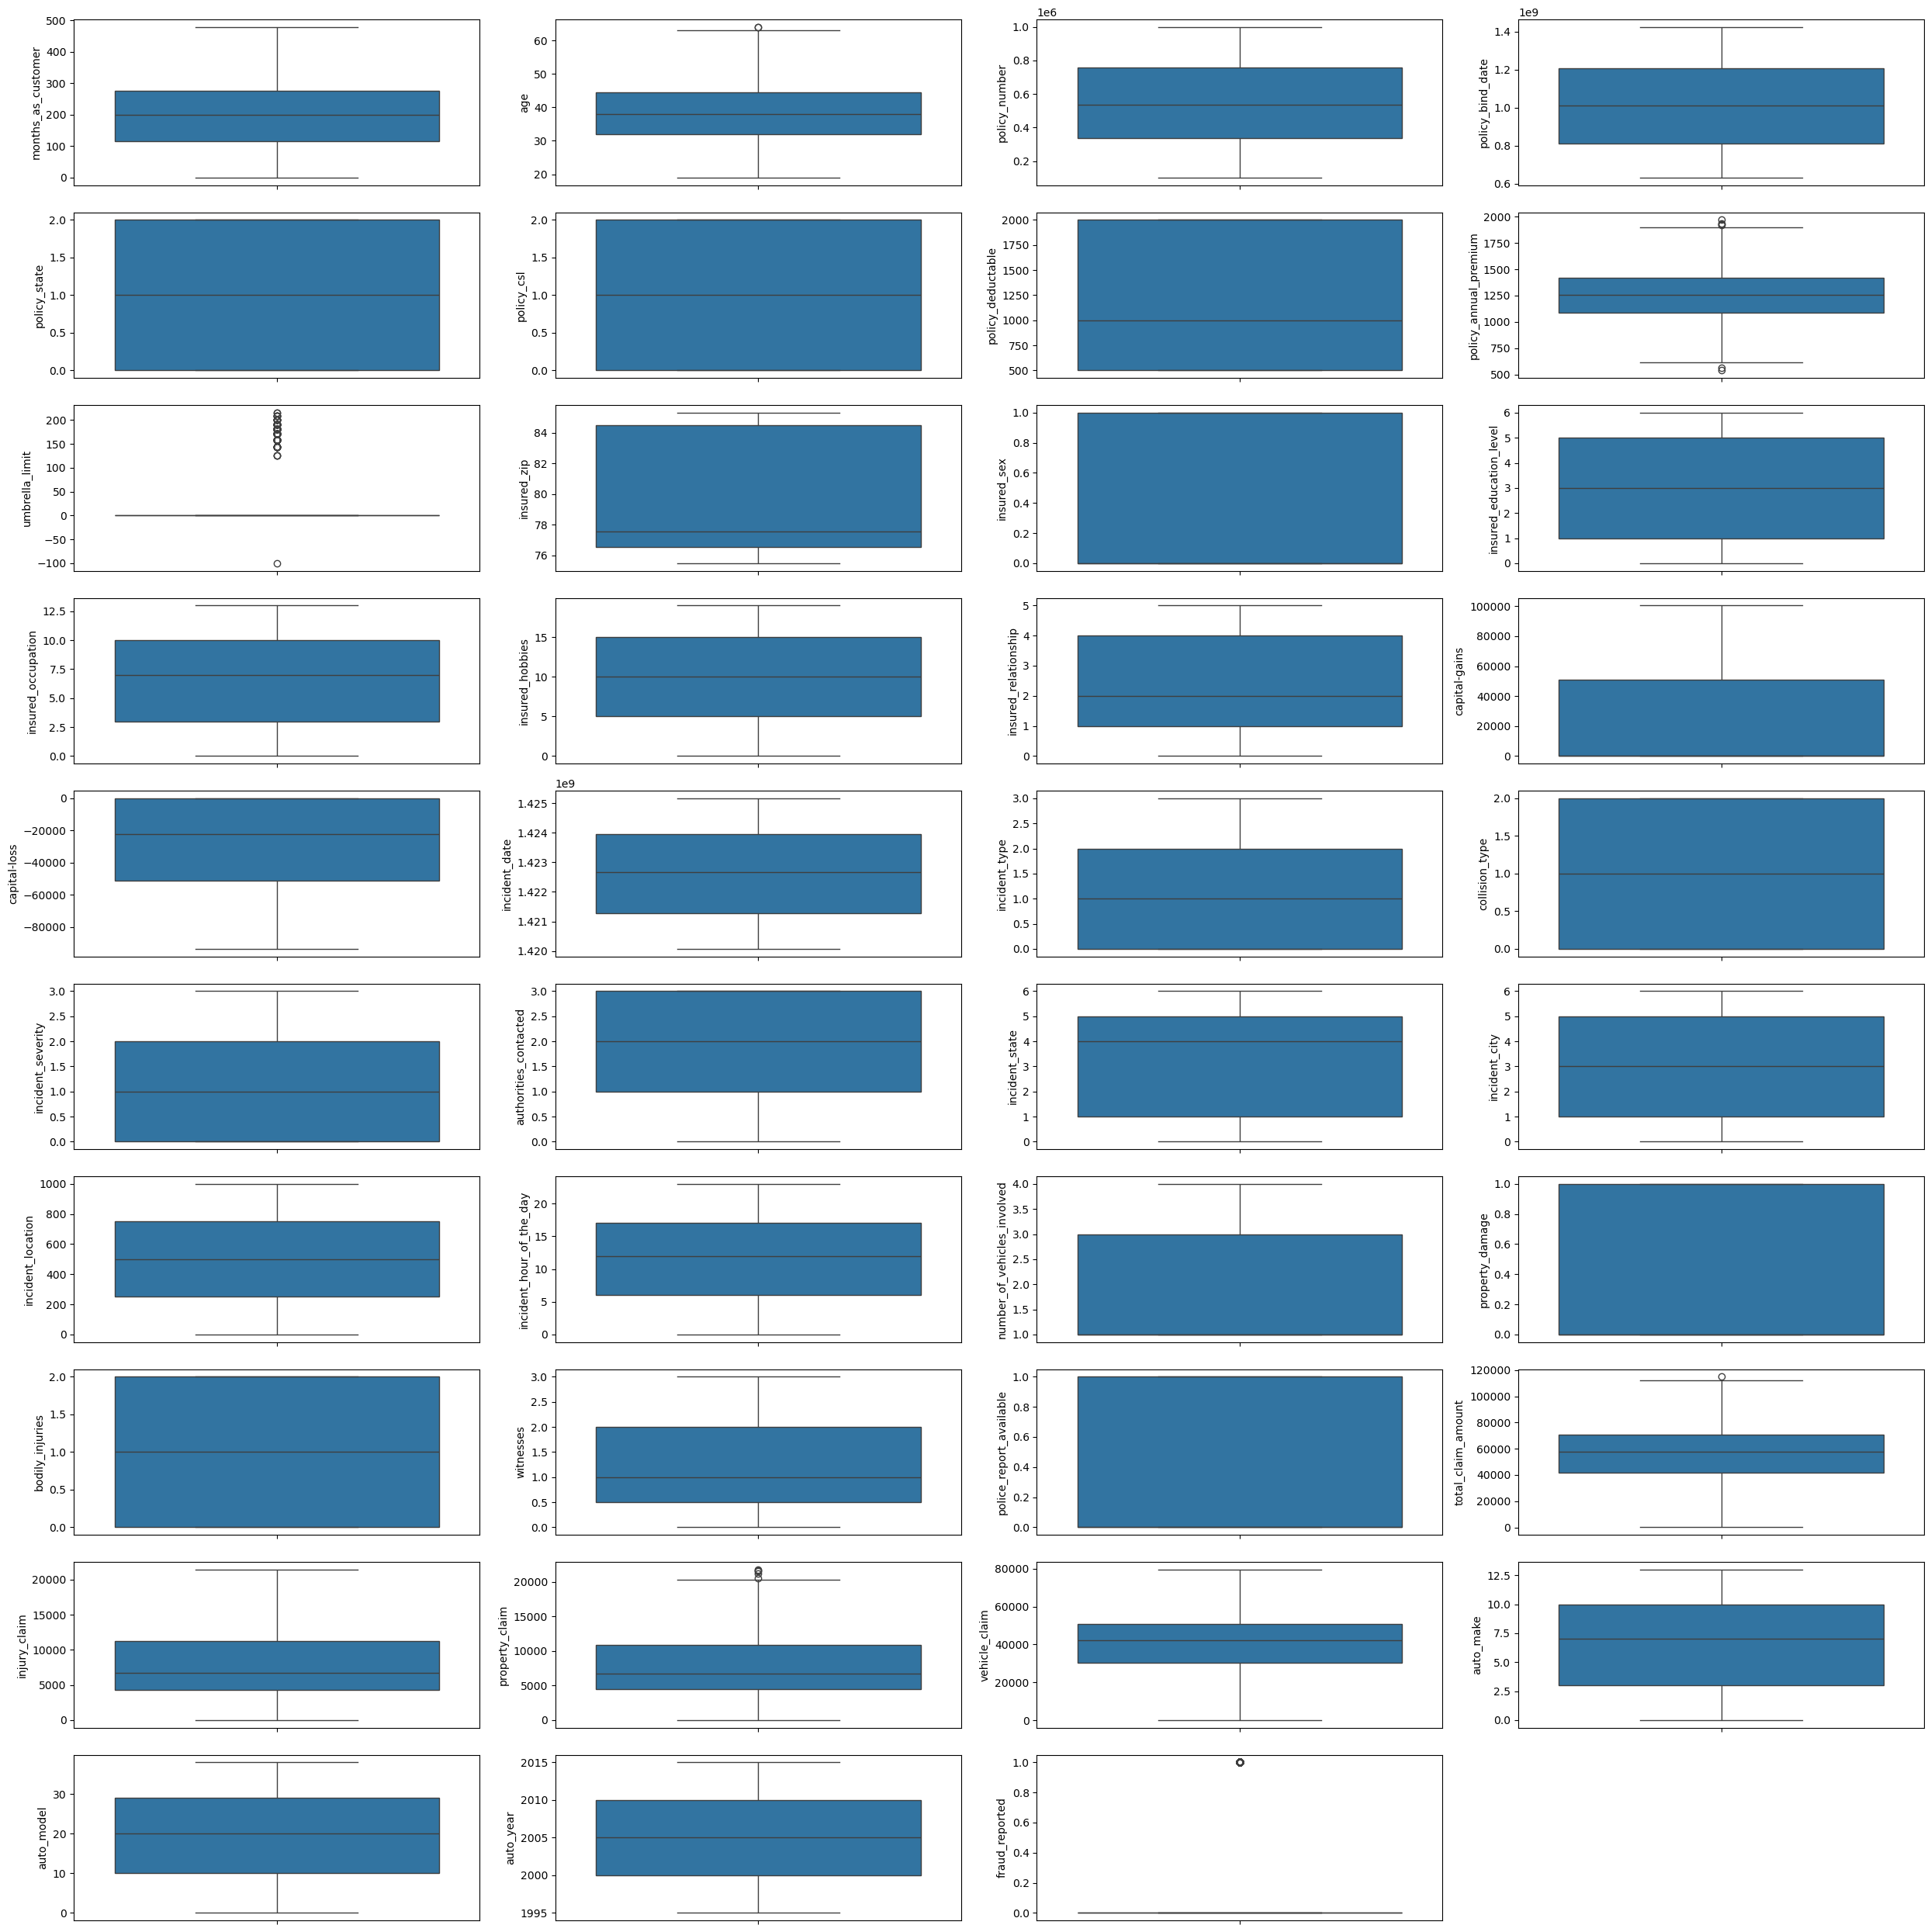

In [159]:
plt.figure(figsize=(25,25))
p=1
for i in insurance_df:
    if p<=40:
        plt.subplot(10,4,p)
        sns.boxplot(insurance_df[i])
    p=p+1
plt.tight_layout()

# Split the input data (x) and target/label (y)

In [162]:
x=insurance_df.drop(columns='fraud_reported',axis=1)
y=insurance_df['fraud_reported']

# Feature selection using chi2 test

H0---> Column is important for prediction (Null hypothesis is accepted)

H1---> Column is not important for prediction (Alternative hypothesis is accepted)

In [166]:
def Testindependent(colx,coly,alpha=0.05):
    x=insurance_df[colx]
    y=insurance_df[coly]
    dfobserved=pd.crosstab(y,x)
    chi2,p,dof,expected=chi2_contingency(dfobserved)
    dfexpected=pd.DataFrame(expected,columns=dfobserved.columns,index=dfobserved.index)
    if p < alpha:
        result="{0} is important for prediction".format(colx)
    else:
        result="{0} is not an important predictor.(Discard {0} from model)".format(colx)
    print(result)

In [294]:
columns_to_test=insurance_df.columns
for i in columns_to_test:
    Testindependent(colx=i,coly='fraud_reported',alpha=0.05)

months_as_customer is not an important predictor.(Discard months_as_customer from model)
age is not an important predictor.(Discard age from model)
policy_number is not an important predictor.(Discard policy_number from model)
policy_bind_date is not an important predictor.(Discard policy_bind_date from model)
policy_state is not an important predictor.(Discard policy_state from model)
policy_csl is not an important predictor.(Discard policy_csl from model)
policy_deductable is not an important predictor.(Discard policy_deductable from model)
policy_annual_premium is not an important predictor.(Discard policy_annual_premium from model)
umbrella_limit is not an important predictor.(Discard umbrella_limit from model)
insured_zip is not an important predictor.(Discard insured_zip from model)
insured_sex is not an important predictor.(Discard insured_sex from model)
insured_education_level is not an important predictor.(Discard insured_education_level from model)
insured_occupation is not 

# Drop the columns that are not important for prediction of target/label

In [297]:
insuranceclaimdf=insurance_df[['insured_hobbies','incident_type','incident_severity','authorities_contacted','incident_state','fraud_reported']]

In [299]:
insuranceclaimdf.head()

,insured_hobbies,incident_type,incident_severity,authorities_contacted,incident_state,fraud_reported
0,17,2,0,3,4,1.0
1,15,3,1,3,5,1.0
2,2,0,1,3,1,0.0
3,2,2,0,3,2,1.0
4,2,3,1,3,1,0.0


In [301]:
x=insuranceclaimdf.drop(columns='fraud_reported',axis=1)
y=insuranceclaimdf['fraud_reported']

# Check for multicollinearity in the dataset using variance inflation factor

In [304]:
def calc_vif(x):
    df=pd.DataFrame()
    df['Columns']=x.columns
    df['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [306]:
calc_vif(x)

,Columns,VIF
0,insured_hobbies,2.823706
1,incident_type,2.170611
2,incident_severity,2.618492
3,authorities_contacted,3.122679
4,incident_state,2.751175


# Check the total count of the Label data using pandas value_counts method

In [309]:
y.value_counts()

fraud_reported
0.0    749
1.0    246
Name: count, dtype: int64

The output of the value count shows that the dataset is imbalanced.

# Balance the dataset using over sampling technique SMOTE

In [314]:
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x,y)

In [316]:
y_balanced.value_counts()

fraud_reported
1.0    749
0.0    749
Name: count, dtype: int64

# Apply StandardScaler technique to the dataset

In [319]:
sc=StandardScaler()
x_scales=sc.fit_transform(x_balanced)
x_scaled=pd.DataFrame(x_scales,columns=x_balanced.columns)
x_scaled.head()

,insured_hobbies,incident_type,incident_severity,authorities_contacted,incident_state
0,1.338230,0.863411,-0.962209,1.232889,0.449339
1,0.985946,1.817239,0.099979,1.232889,0.915481
2,-1.303895,-1.044244,0.099979,1.232889,-0.949088
3,-1.303895,0.863411,-0.962209,1.232889,-0.482946
4,-1.303895,1.817239,0.099979,1.232889,-0.949088


# Define the model for classification task

In [322]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()
svc=SVC()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bag=BaggingClassifier()
extra=ExtraTreesClassifier()

models=[("Logistic Regression",lg),
        ("DecisionTreeClassifier",dtc),
        ("RandomForestClassifier",rfc),
        ("KNeighborsClassifier",knn),
        ("GaussianNB",gnb),
        ("SVC",svc),
        ("AdaBoostClassifier",ada),
        ("GradientBoostingClassifier",gbc),
        ("BaggingClassifier",bag),
        ("ExtraTreesClassifier",extra)]

# Apply cross validation technique to check for the best performing model and to avoid overfitting in the dataset

In [325]:
model_data=[lg,dtc,rfc,knn,gnb,svc,ada,gbc,bag,extra]
for i in model_data:
    cvs=cross_val_score(i,x_scaled,y_balanced,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for ",i,"is ",cvs,"and mean of the cross validation is ",np.mean(cvs))

Cross validation score for  LogisticRegression() is  [0.73       0.77333333 0.77       0.81270903 0.81605351] and mean of the cross validation is  0.7804191750278707
Cross validation score for  DecisionTreeClassifier() is  [0.77333333 0.84       0.85333333 0.87959866 0.87959866] and mean of the cross validation is  0.8451727982162766
Cross validation score for  RandomForestClassifier() is  [0.82666667 0.88666667 0.9        0.909699   0.909699  ] and mean of the cross validation is  0.8865462653288739
Cross validation score for  KNeighborsClassifier() is  [0.76666667 0.82       0.80666667 0.84615385 0.84615385] and mean of the cross validation is  0.8171282051282052
Cross validation score for  GaussianNB() is  [0.72       0.76       0.74333333 0.77257525 0.77591973] and mean of the cross validation is  0.754365663322185
Cross validation score for  SVC() is  [0.74333333 0.79333333 0.77666667 0.84280936 0.81605351] and mean of the cross validation is  0.7944392419175028
Cross validation s

# Get the best random state and maximum accuracy for the model

In [340]:
maxrs=0
maxacc=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_balanced,test_size=0.30,random_state=i)
    gbc.fit(x_train,y_train)
    y_pred=gbc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score is",maxacc,"and maximum random state is",maxrs)

Accuracy score is 0.9222222222222223 and maximum random state is 93


In [342]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_balanced,test_size=0.30,random_state=93)

In [344]:
x_train.shape

(1048, 5)

In [346]:
x_test.shape

(450, 5)

In [348]:
y_train.shape

(1048,)

In [350]:
y_test.shape

(450,)

# Build and train the models for classification task

In [353]:
model_list=[]
for model_name,model_data in models:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    r2=r2_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    model={"Model name":model_name,"R2_score":r2,"Accuracy Score":accuracy,"Precision Score":precision,"Recall Score":recall}
    model_list.append(model)
df=pd.DataFrame(model_list)
df=df.sort_values(by="Accuracy Score",ascending=False)
df

,Model name,R2_score,Accuracy Score,Precision Score,Recall Score
6,AdaBoostClassifier,0.686411,0.922222,0.916667,0.942857
7,GradientBoostingClassifier,0.686411,0.922222,0.913386,0.946939
2,RandomForestClassifier,0.560976,0.891111,0.904959,0.893878
8,BaggingClassifier,0.507218,0.877778,0.892562,0.881633
9,ExtraTreesClassifier,0.426580,0.857778,0.878661,0.857143
1,DecisionTreeClassifier,0.390742,0.848889,0.876596,0.840816
5,SVC,0.336984,0.835556,0.905213,0.779592
3,KNeighborsClassifier,0.283225,0.822222,0.818533,0.865306
0,Logistic Regression,0.256346,0.815556,0.852174,0.800000
4,GaussianNB,0.112992,0.780000,0.787402,0.816327


In [370]:
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)
print("R-Score",r2_score(y_test,y_pred_gbc))
print("Accuracy Score", accuracy_score(y_test,y_pred_gbc))
print("Precision Score",precision_score(y_test,y_pred_gbc))
print("Recall Score",recall_score(y_test,y_pred_gbc))

R-Score 0.686411149825784
Accuracy Score 0.9222222222222223
Precision Score 0.9133858267716536
Recall Score 0.9469387755102041


# Hyperparameter tuning for Gradient Boosting Classifier

In [356]:
param_grids={"loss" : ['log_loss', 'exponential'],"criterion" : ['friedman_mse', 'squared_error'],"max_features" : ['sqrt', 'log2']}

In [358]:
param_grids

{'loss': ['log_loss', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['sqrt', 'log2']}

In [360]:
gscv=GridSearchCV(gbc,param_grids,scoring='accuracy',n_jobs=-1,cv=5)

In [362]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [366]:
gscv.best_params_

{'criterion': 'squared_error', 'loss': 'log_loss', 'max_features': 'log2'}

In [368]:
gbc1=GradientBoostingClassifier(loss='log_loss',criterion='squared_error',max_features='log2')
gbc1.fit(x_train,y_train)
y_pred_gbc1=gbc1.predict(x_test)
print("R-Score",r2_score(y_test,y_pred_gbc1))
print("Accuracy Score", accuracy_score(y_test,y_pred_gbc1))
print("Precision Score",precision_score(y_test,y_pred_gbc1))
print("Recall Score",recall_score(y_test,y_pred_gbc1))

R-Score 0.6684917869586859
Accuracy Score 0.9177777777777778
Precision Score 0.9094488188976378
Recall Score 0.9428571428571428


# ROC Curve

In [376]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_gbc)

In [378]:
fpr

array([0.        , 0.10731707, 1.        ])

In [380]:
tpr

array([0.        , 0.94693878, 1.        ])

In [382]:
threshold

array([inf,  1.,  0.])

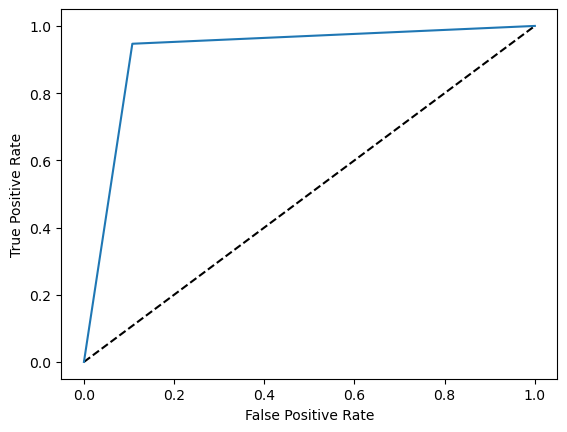

In [384]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# ROC AUC Score

In [389]:
roc_score=roc_auc_score(y_test,y_pred_gbc)
roc_score

0.9198108511697363

# Save the best model

In [394]:
import pickle

filename="InsuranceClaim.pkl"
pickle.dump(gbc,open(filename,"wb"))

# Load the model

In [399]:
import pickle

model=pickle.load(open("InsuranceClaim.pkl","rb"))
model.predict(x_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1.

# Create the dataframe for Actual output and Predicted output

In [402]:
a=np.array(y_test)
df=pd.DataFrame()
df["Actual Output"]=a
df["Predicted Output"]=y_pred_gbc
df

,Actual Output,Predicted Output
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
445,1.0,0.0
446,1.0,1.0
447,1.0,1.0
448,0.0,0.0


# Line plot to show the relationship between actual output and predicted output

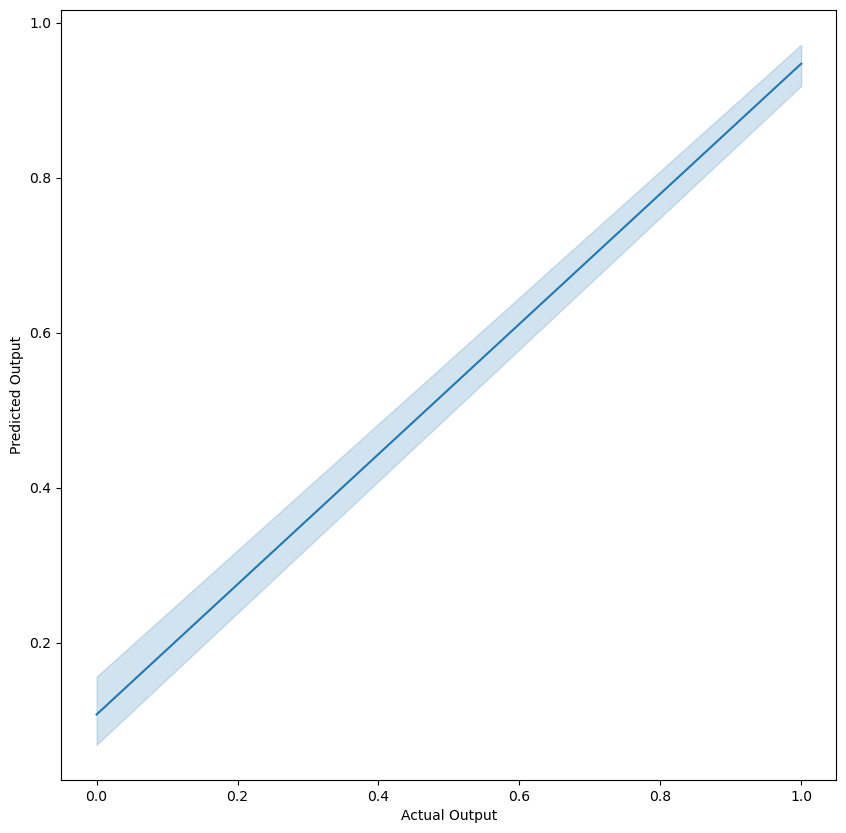

In [411]:
plt.figure(figsize=(10,10))
sns.lineplot(df,x='Actual Output',y='Predicted Output')
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The output from the lineplot shows the relationship between the actual output and predicted output. The increase in the value of actual output increases the value of predicted output shows that the Gradient Boosting Classifier model perform well when compared to other classifier models.